# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 1 - Extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
import csv



In [21]:

def read_data(file):
    df = pd.read_csv(file)
     
    return df


In [22]:
df=read_data("fintech_data_MET_P2_52_0324_clean.csv")

In [14]:
df2=read_data("stream_data_cleaned.csv")

In [23]:
df.isnull().sum()

customer_id                            0
emp_title                              0
emp_length                             0
annual_inc                             0
annual_inc_joint                       0
zip_code                               0
addr_state                             0
avg_cur_bal                            0
tot_cur_bal                            0
loan_amount                            0
state                                  0
funded_amount                          0
term                                   0
int_rate                               0
issue_date                             0
pymnt_plan                             0
description                            0
month_number                           0
salary_can_cover                       0
installment_per_month                  0
home_ownership_ANY                     0
home_ownership_MORTGAGE                0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_sta

# 2- EDA

In [97]:
pd.set_option('display.max_columns', None)
df.head(10)

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YicyXHhkMVx4ODVceDExXG5gTyVceDhjRChccmJceGUzJS...,Project Manager,3 years,MORTGAGE,110000.0,NaN,Not Verified,085xx,NJ,36486.0,255401.0,83748,Current,10000.0,NJ,10000.0,36 months,0.0646,2,19 January 2019,False,Individual,debt_consolidation,Debt consolidation
1,YiJceGU4XHhlZTNceGFhXHhkM1x4MTNUJ294XHhmM2VsNl...,IT supervisor,3 years,MORTGAGE,66000.0,NaN,Verified,477xx,IN,36558.0,182789.0,142833,Current,14400.0,IN,14400.0,60 months,0.1262,11,17 September 2017,False,Individual,debt_consolidation,Debt consolidation
2,Yid9XHhiOFx4MTVceDkzXHhmMVx4ODQlXHhjZVx4YjVceD...,Project Engineer,1 year,MORTGAGE,79000.0,NaN,Source Verified,993xx,WA,37390.0,299117.0,201119,Fully Paid,20000.0,WA,20000.0,60 months,0.1899,16,17 March 2017,False,Individual,debt_consolidation,Debt consolidation
3,YidceDhhXHhlM15ceDgwIVx4ODlceGRhQFx4MDclMFx4YW...,Driver,10+ years,MORTGAGE,40000.0,NaN,Source Verified,626xx,IL,5160.0,46437.0,86602,Current,10000.0,IL,10000.0,36 months,0.0808,2,18 June 2018,False,Individual,credit_card,Credit card refinancing
4,YidceGMxaVx4ODNceGIzXHg4ZXw5XHg5ZVx4OGNceDA2T1...,delivery,4 years,RENT,33000.0,NaN,Source Verified,166xx,PA,11209.0,56045.0,134390,Current,13000.0,PA,13000.0,60 months,0.1273,9,18 November 2018,False,Individual,debt_consolidation,Debt consolidation
5,YidaXHhjZnhceGU3XHg5MFx4ZjRceGY1XHhkY1x4ZWFvem...,Project Manager,7 years,RENT,70000.0,NaN,Not Verified,070xx,NJ,5450.0,119891.0,227652,Fully Paid,25000.0,NJ,25000.0,60 months,0.1333,14,15 August 2015,False,Individual,debt_consolidation,Debt consolidation
6,Yic6dV1ceGQyXHhmMFx4ZmFceGIzfipceGU0fFx4YTE4XH...,Finance Manager,2 years,MORTGAGE,200000.0,NaN,Not Verified,463xx,IN,19753.0,256787.0,159517,Current,15200.0,IN,15200.0,60 months,0.1408,15,17 September 2017,False,Individual,debt_consolidation,Debt consolidation
7,YidnXHgxYUFceDhkXHhlNVx4ZjNceGQzXHgwNU1ceGY0XH...,Supervisory Police Officer,6 years,MORTGAGE,56500.0,NaN,Not Verified,283xx,NC,27377.0,273770.0,26174,Fully Paid,5000.0,NC,5000.0,36 months,0.0726,4,15 December 2015,False,Individual,home_improvement,Home improvement
8,YidceDA4ZE44XHgxMD1YTnJceGJjXWpceGQ0XHhhMFx4ZT...,Conductor,10+ years,MORTGAGE,126000.0,NaN,Source Verified,064xx,CT,51099.0,357696.0,133433,Fully Paid,13000.0,CT,13000.0,36 months,0.1199,7,15 January 2015,False,Individual,credit_card,Credit card refinancing
9,YiJ7K1x4MDN0YVx4YjhkXHhkMF1YeFx4YmNceGYwXlx4ZG...,Project Manager,10+ years,MORTGAGE,75000.0,NaN,Source Verified,761xx,TX,14220.0,156416.0,239814,Fully Paid,30000.0,TX,30000.0,36 months,0.1561,14,14 March 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation


In [98]:
df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1.898000e+03,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25799.000000,27030.000000
mean,7.958005e+04,1.323664e+05,13699.805993,1.447354e+05,136116.605734,15503.214021,15503.214021,0.131349,10.987532
std,7.294772e+04,8.332242e+04,16820.305157,1.632325e+05,77852.259808,9451.817873,9451.817873,0.048902,6.324558
min,4.450000e+02,2.060000e+04,0.000000,0.000000e+00,3.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.783925e+04,8.700000e+04,3155.250000,3.025950e+04,69512.500000,8000.000000,8000.000000,0.094400,6.000000
50%,6.600000e+04,1.160000e+05,7504.500000,8.150450e+04,135894.000000,13450.000000,13450.000000,0.126200,10.000000
75%,9.500000e+04,1.560000e+05,18936.000000,2.162978e+05,203750.750000,20825.000000,20825.000000,0.160200,15.000000
max,6.500031e+06,1.750000e+06,338522.000000,4.062258e+06,270289.000000,40000.000000,40000.000000,0.309900,35.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24664 non-null  object 
 2   Emp Length           25160 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1898 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

In [100]:
df.isnull().mean()*100


Customer Id             0.000000
Emp Title               8.753237
Emp Length              6.918239
Home Ownership          0.000000
Annual Inc              0.000000
Annual Inc Joint       92.978172
Verification Status     0.000000
Zip Code                0.000000
Addr State              0.000000
Avg Cur Bal             0.000000
Tot Cur Bal             0.000000
Loan Id                 0.000000
Loan Status             0.000000
Loan Amount             0.000000
State                   0.000000
Funded Amount           0.000000
Term                    0.000000
Int Rate                4.554199
Grade                   0.000000
Issue Date              0.000000
Pymnt Plan              0.000000
Type                    0.000000
Purpose                 0.000000
Description             0.895302
dtype: float64

In [101]:
df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1.898000e+03,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25799.000000,27030.000000
mean,7.958005e+04,1.323664e+05,13699.805993,1.447354e+05,136116.605734,15503.214021,15503.214021,0.131349,10.987532
std,7.294772e+04,8.332242e+04,16820.305157,1.632325e+05,77852.259808,9451.817873,9451.817873,0.048902,6.324558
min,4.450000e+02,2.060000e+04,0.000000,0.000000e+00,3.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.783925e+04,8.700000e+04,3155.250000,3.025950e+04,69512.500000,8000.000000,8000.000000,0.094400,6.000000
50%,6.600000e+04,1.160000e+05,7504.500000,8.150450e+04,135894.000000,13450.000000,13450.000000,0.126200,10.000000
75%,9.500000e+04,1.560000e+05,18936.000000,2.162978e+05,203750.750000,20825.000000,20825.000000,0.160200,15.000000
max,6.500031e+06,1.750000e+06,338522.000000,4.062258e+06,270289.000000,40000.000000,40000.000000,0.309900,35.000000


## Question 1:
Is there a relationship between individuals who are late on their loan payments and their income levels across different states?

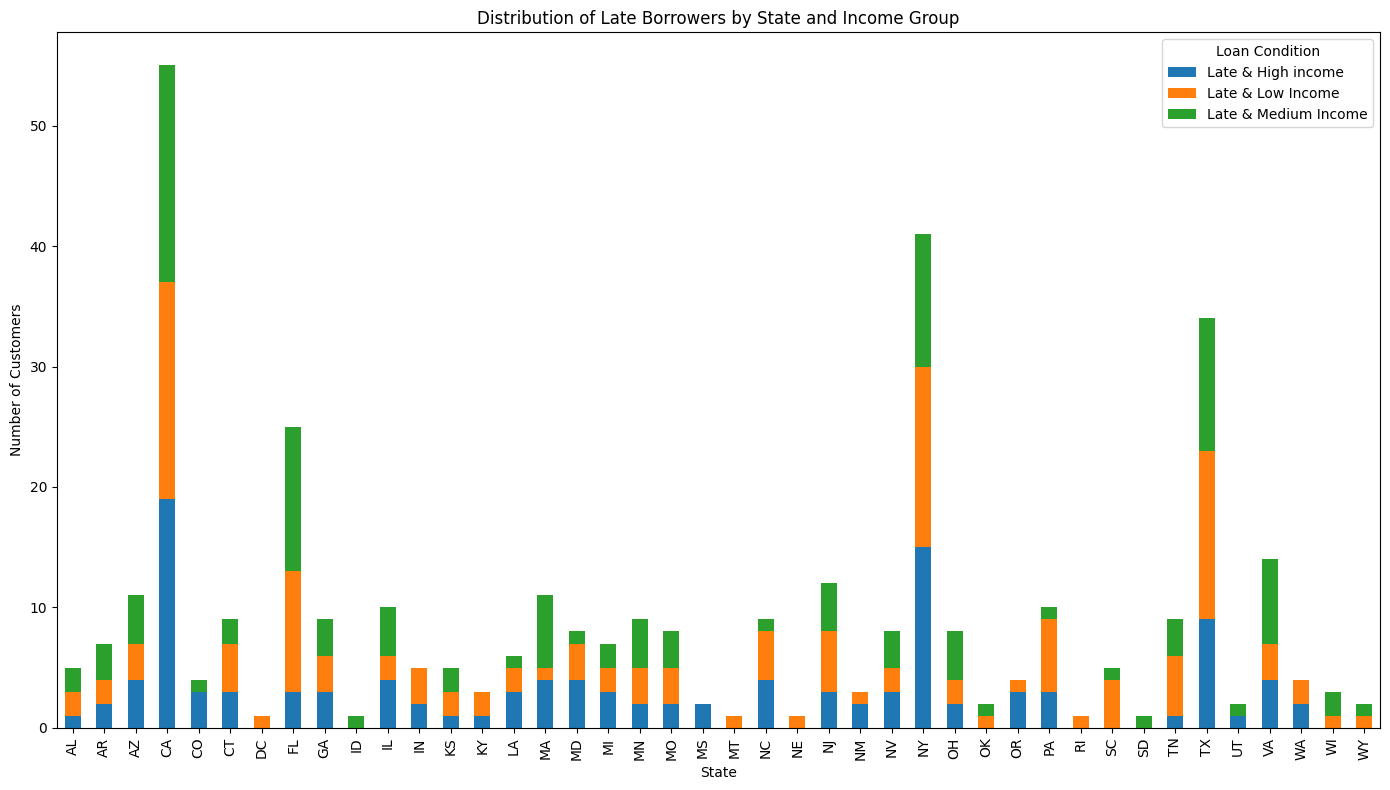

In [102]:

def plot_late_borrowers_by_state_and_income(df):
    df['income_group'] = pd.qcut(df['Annual Inc'], q=3, labels=['Low Income', 'Middle Income', 'High Income'])
    
    # Create a 'loan_status_condition' column based on Loan Status and Income Group
    df['loan_status_condition'] = df.apply(
        lambda x: 'Late & High income' if (x['Loan Status'] in ['Late (16-30 days)', 'Late (31-120 days)'] and x['income_group'] == 'High Income')
        else ('Late & Medium Income' if (x['Loan Status'] in ['Late (16-30 days)', 'Late (31-120 days)'] and x['income_group'] == 'Middle Income')
              else ('Late & Low Income' if (x['Loan Status'] in ['Late (16-30 days)', 'Late (31-120 days)'] and x['income_group'] == 'Low Income')
                    else None)), axis=1)

    # Filter for rows where loan_status_condition is not null
    df_filtered = df[df['loan_status_condition'].notnull()]

    state_grouped = df_filtered.groupby(['State', 'loan_status_condition']).size().unstack(fill_value=0)
    # Plot the stacked bar chart
    state_grouped.plot(kind='bar', stacked=True, figsize=(14, 8))

    # Add titles and labels
    plt.title('Distribution of Late Borrowers by State and Income Group')
    plt.ylabel('Number of Customers')
    plt.xlabel('State')
    plt.xticks(rotation=90)
    plt.legend(title='Loan Condition', loc='upper right')
    plt.tight_layout()
    plt.show()
    df.drop(columns=['income_group', 'loan_status_condition'], inplace=True)


plot_late_borrowers_by_state_and_income(df)


States like California, Florida, Texas, and New York stand out, with a higher number of late borrowers across all income levels. In many states, the distribution of late borrowers across income groups is relatively balanced, though states like CO , MD and OR see more HIgh-income borrowers falling behind on payments compared to other income groups. In states such as SC ,RI and PA lower-income borrowers seem to face greater difficulties.

## Question 2
What are the top 5 loan purposes that had the highest loan amounts issued, and how did the loan amounts vary over time for each purpose?


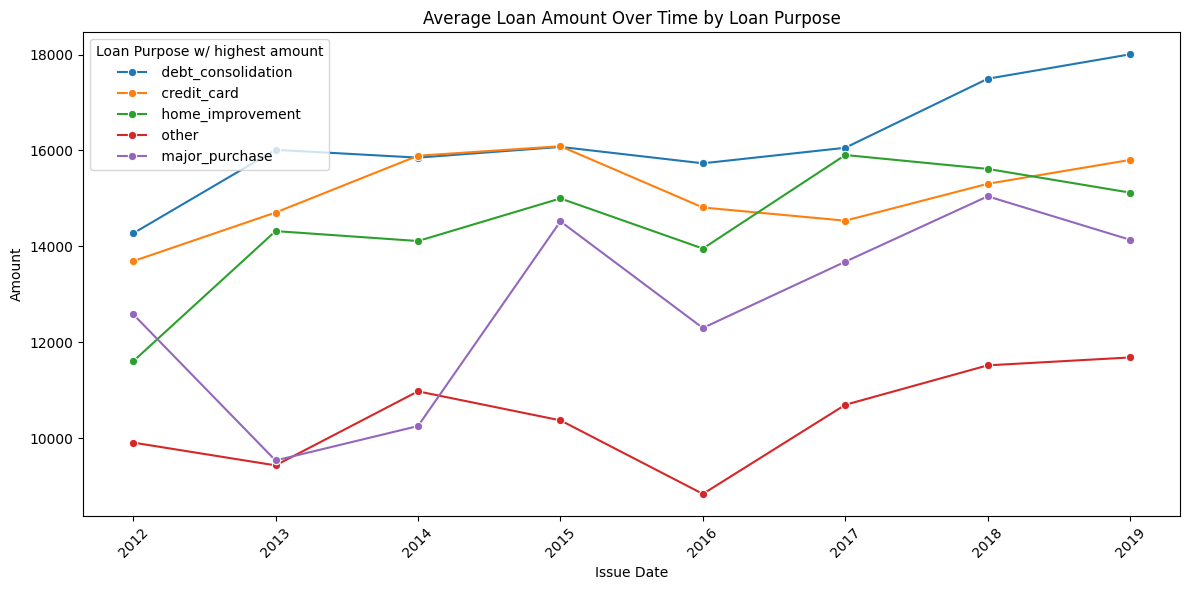

In [103]:
def plot_loan_amounts_by_purpose_over_time(df):
    df['Issue Date'] = pd.to_datetime(df['Issue Date'])
    df['issue_year'] = df['Issue Date'].dt.year

    df_grouped = df.groupby(['Purpose', 'issue_year'])[['Loan Amount']].mean().reset_index()
    plt.figure(figsize=(12, 6))
    

    top_5_purposes=df.groupby(['Purpose'])[['Loan Amount']].sum().reset_index().sort_values(by='Loan Amount', ascending=False).head(5)
    top_5_purposes=top_5_purposes['Purpose'].tolist()
    for term in top_5_purposes:
        term_data = df_grouped[df_grouped['Purpose'] == term]
        sns.lineplot(data=term_data, x='issue_year', y='Loan Amount', label=f' {term}', marker='o')

    plt.title('Average Loan Amount Over Time by Loan Purpose')
    plt.xlabel('Issue Date')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Purpose w/ highest amount', loc='upper left')
    plt.tight_layout()
    plt.show()
    df.drop(['issue_year'], axis=1, inplace=True)

plot_loan_amounts_by_purpose_over_time(df)


The top 5 purposes for loans with the highest amounts include debt consolidation, credit card payment, home improvement, major purchases, and other purposes. Among these, debt consolidation consistently dominates, with the loan amounts increasing over time. Credit card payment remains relatively stable, while home improvement and other purposes see moderate fluctuations. Major purchases experience the most volatility, with sharp increases and decreases across the years.

## Question 3
How do average loan amounts vary across different loan types (Direct Pay, Individual, Joint) and loan grades (A-G)?

C:\Users\user\AppData\Local\Temp\ipykernel_10188\3965472650.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['type', 'letter_grade'])['Loan Amount'].mean().unstack()


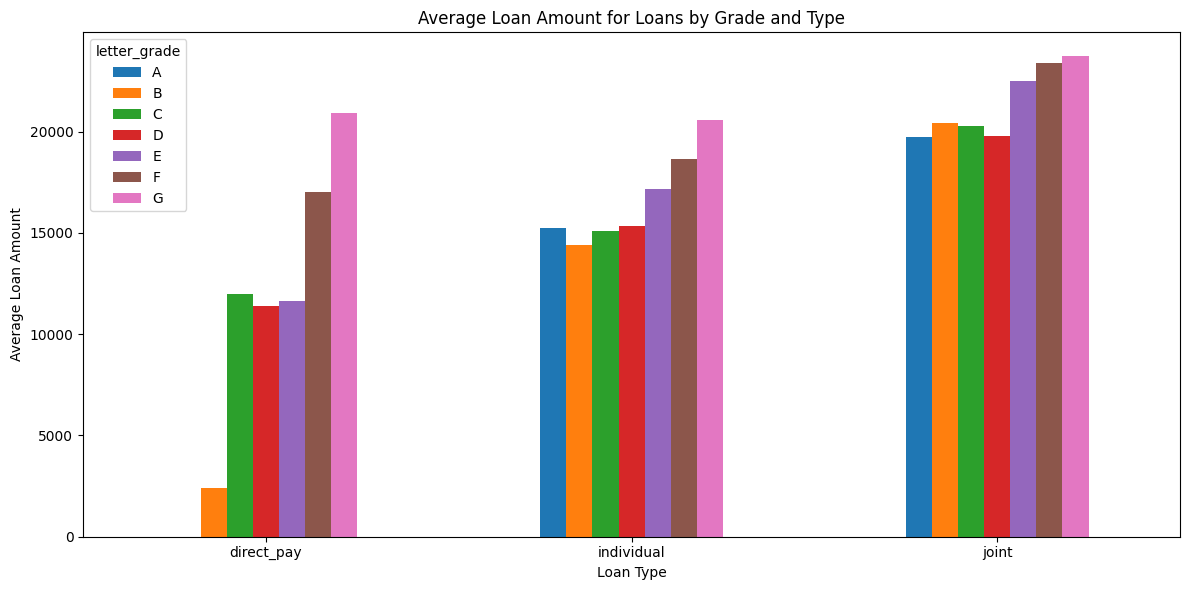

In [104]:
def plot_loan_amount_by_type_and_grade(df):
    bins = [1, 5, 10, 15, 20, 25, 30, 35]
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    df['letter_grade'] = pd.cut(df['Grade'], bins=bins, labels=labels, right=True, include_lowest=True)
    df['type']=df['Type'].str.lower().replace('joint app', 'joint')
    grouped_data = df.groupby(['type', 'letter_grade'])['Loan Amount'].mean().unstack()

    # Plot grouped bar chart
    grouped_data.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Loan Amount for Loans by Grade and Type')
    plt.xlabel('Loan Type')
    plt.ylabel('Average Loan Amount')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    df.drop(['letter_grade', 'type'], axis=1, inplace=True)


plot_loan_amount_by_type_and_grade(df)



Borrowers with lower creditworthiness tend to take out the largest loans, particularly in the Direct Pay categories.Grade A and B borrowers tend to borrow smaller amounts, especially in Direct Pay loans (No Grade A), indicating that borrowers with better creditworthiness may not need to borrow as much.Overall, Joint type have higher loan amount which makes sense, but Joint loans show smaller variability across loan grades compared to Direct Pay.


## Question 4
How does employment length impact loan repayment rates (status is fully  paid) across different income groups (Low, Middle, High Income)?

C:\Users\user\AppData\Local\Temp\ipykernel_10188\758307567.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Emp Length', 'income_group'])['fully_paid'].mean().unstack()


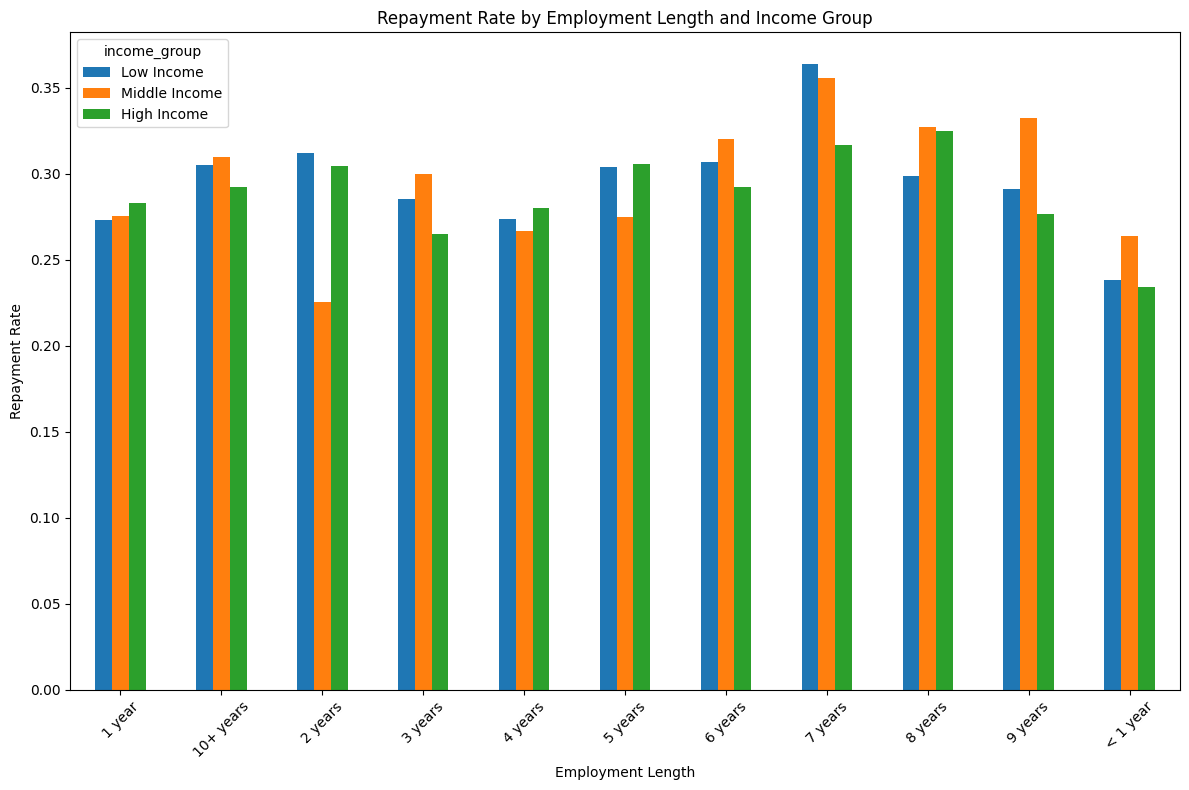

In [105]:
#########################################3
def repayment_rate_by_emp_length_and_income(df):
    df['income_group'] = pd.qcut(df['Annual Inc'], q=3, labels=['Low Income', 'Middle Income', 'High Income'])
    df['fully_paid'] = df['Loan Status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
    grouped_data = df.groupby(['Emp Length', 'income_group'])['fully_paid'].mean().unstack()

    # Plot grouped bar chart
    grouped_data.plot(kind='bar', stacked=False, figsize=(12, 8))
    plt.title('Repayment Rate by Employment Length and Income Group')
    plt.xlabel('Employment Length')
    plt.ylabel('Repayment Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    df.drop(['income_group', 'fully_paid'], axis=1, inplace=True)
# Usage
repayment_rate_by_emp_length_and_income(df)

In general, longer employment lengths are associated with higher repayment rates. Borrowers who have been employed for 7 years or more show the highest repayment rates, regardless of income group.There is not much difference between the income groups for each emp length (except maybe for 2 years we can see the group  with least repayment rate is the middle income)

## Question 5
How does average annual income vary across different home ownership statuses and verification statuses?

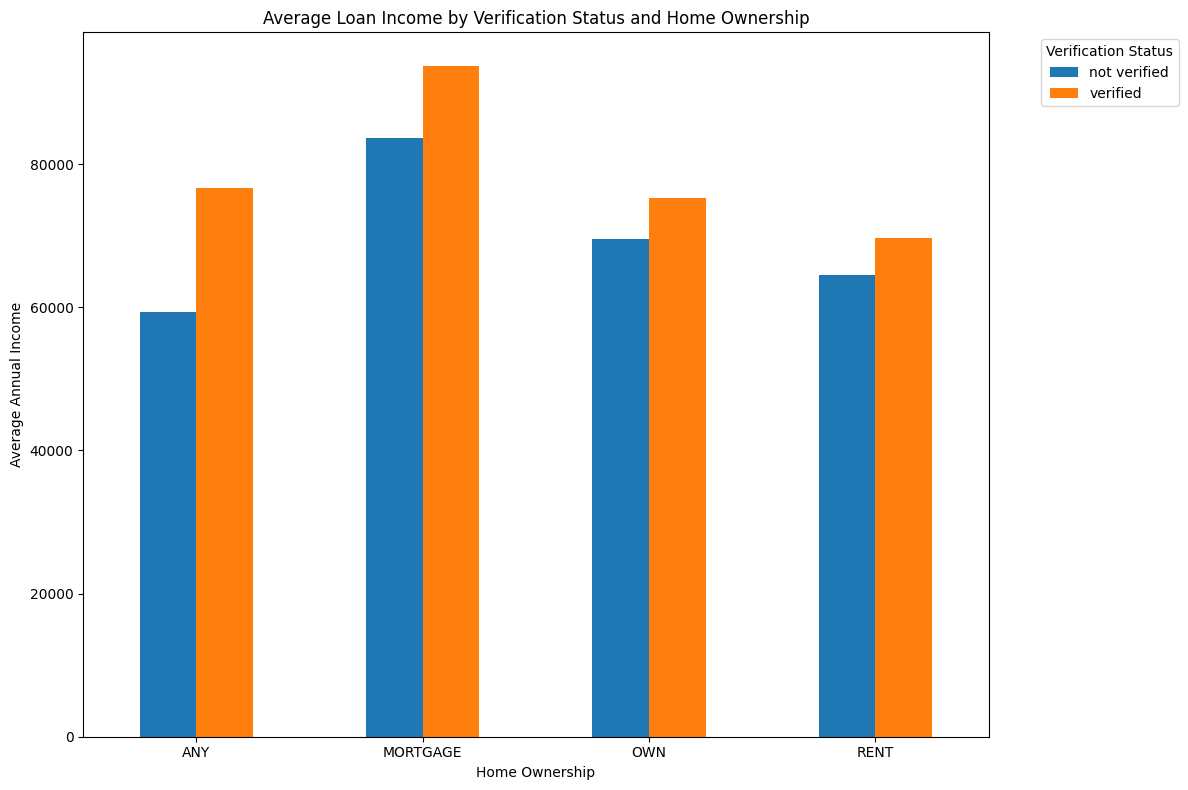

In [106]:
def plot_loan_amount_by_verification_and_home(df):
    df['Verification'] = df['Verification Status'].str.lower().replace('source verified', 'verified')

    grouped_data = df.groupby(['Home Ownership','Verification'])['Annual Inc'].mean().unstack()

    grouped_data.plot(kind='bar', stacked=False, figsize=(12, 8))

    # Customize the chart
    plt.title('Average Loan Income by Verification Status and Home Ownership')
    plt.xlabel('Home Ownership')
    plt.ylabel('Average Annual Income')
    plt.xticks(rotation=0)
    plt.legend(title='Verification Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    df.drop(['Verification'], axis=1, inplace=True)




plot_loan_amount_by_verification_and_home(df)


Mortgage holders consistently have the highest average incomes, particularly when their income is fully verified. This suggests that wealthier borrowers tend to have mortgages and are more likely to have their income verified.
The other 3 status are pretty close. ALso,
Verification status correlates strongly with higher incomes across all homeownership categories, implying that higher-income borrowers are more likely to have their income verified.

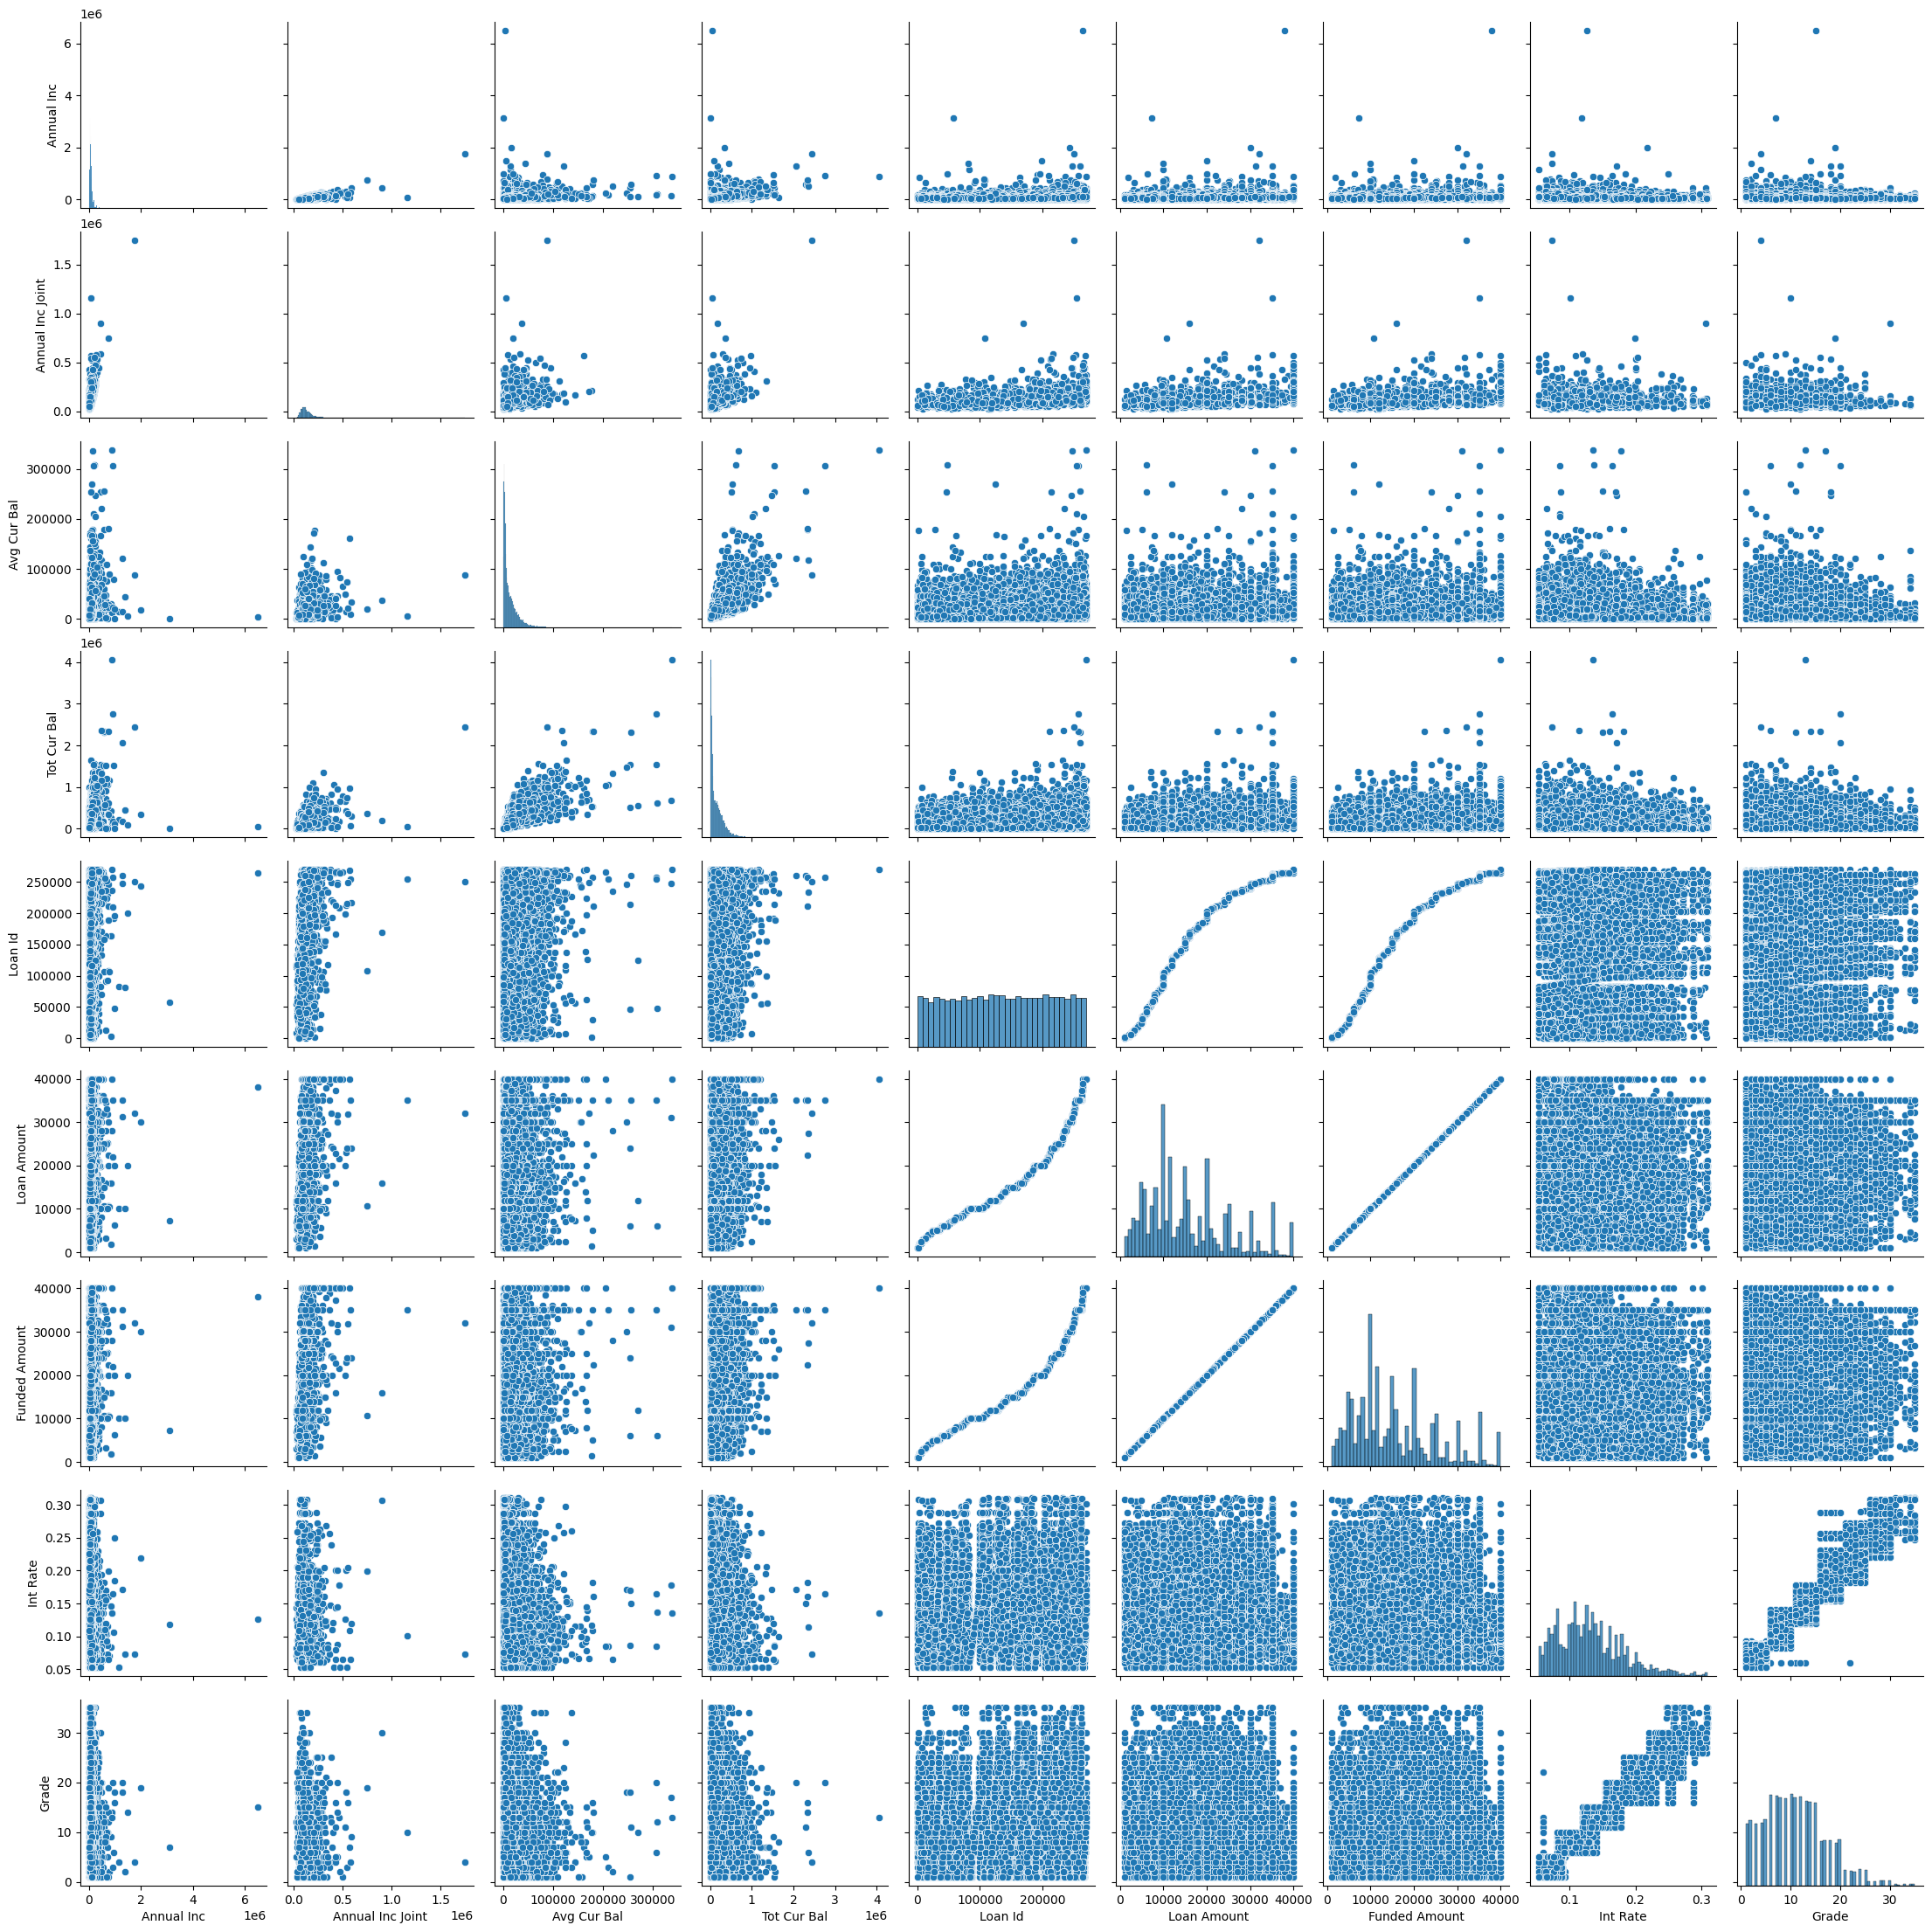

In [107]:

def plot_scatter_matrix(data):
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    sns.pairplot(numerical_data)
    plt.show()

plot_scatter_matrix(df)


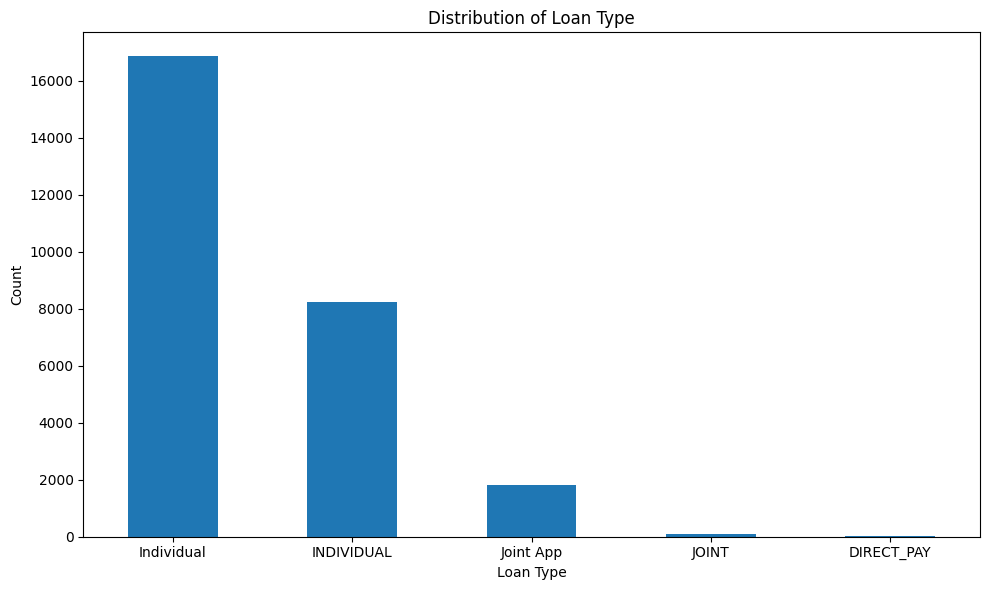

In [108]:
##plot distribution of loan type
plt.figure(figsize=(10, 6))
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

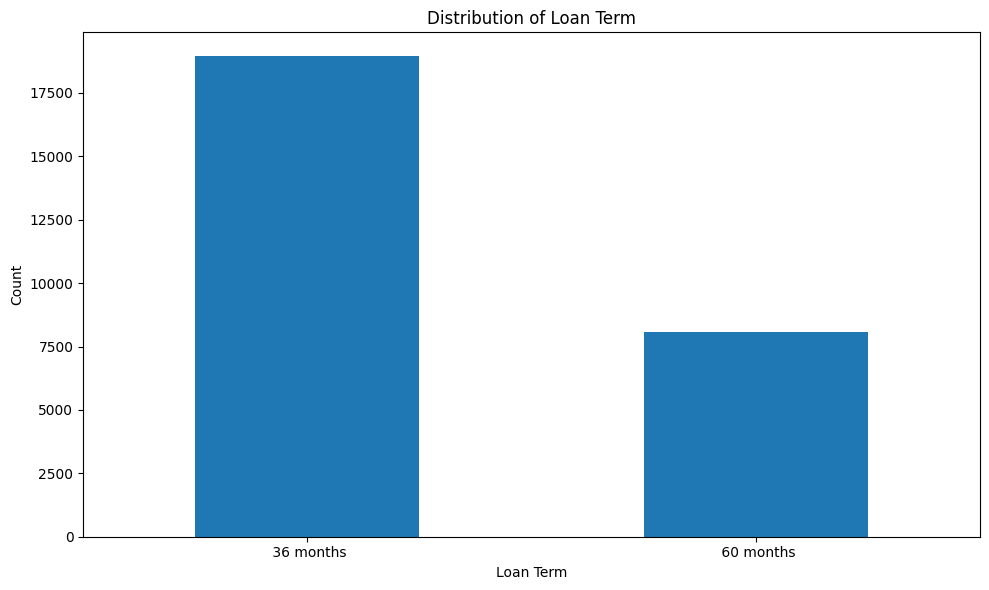

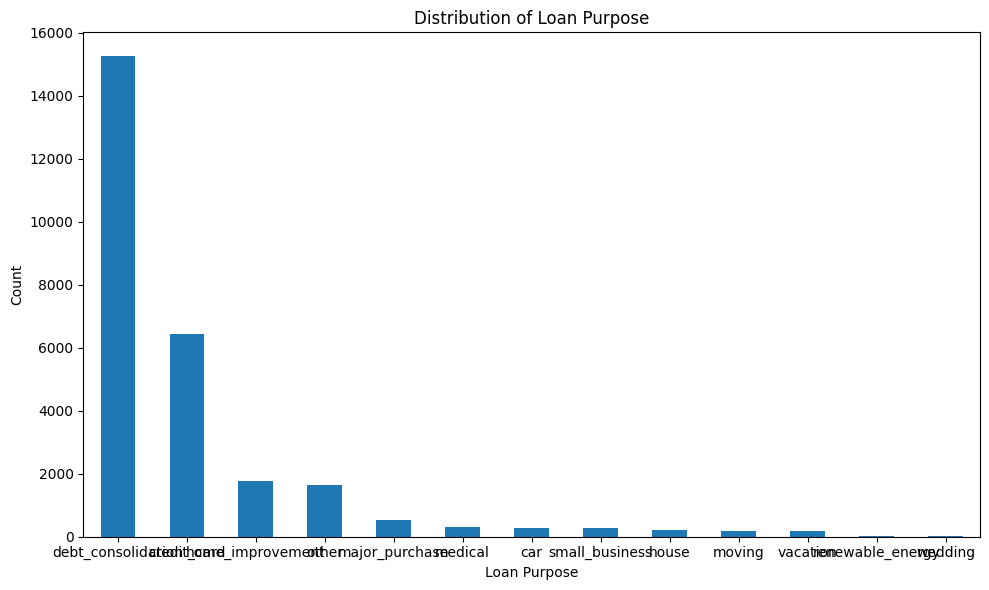

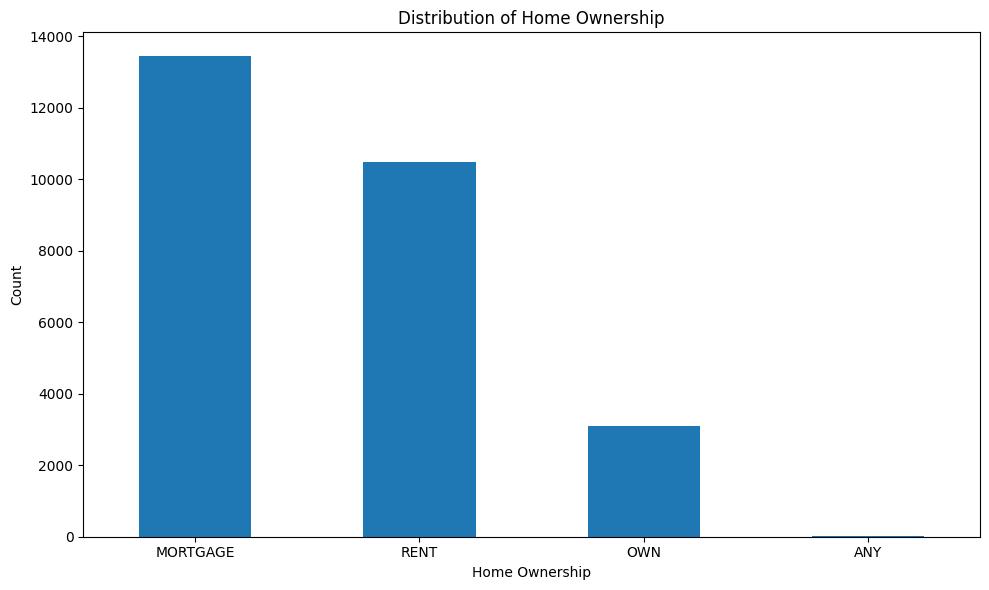

In [109]:
plt.figure(figsize=(10, 6))
df['Term'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df['Purpose'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df['Home Ownership'].value_counts().plot(kind='bar')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2- Tidying up column names


In [110]:
df['Loan Id'].nunique()==len(df)

True

In [111]:

def tidy_col_names(df):
    df_temp=df.copy()
    df_temp.columns = df_temp.columns.str.lower().str.replace(' ', '_')
    return df_temp
def choose_suitable_index(df):
    df.set_index('loan_id', inplace=True)
    return df
###Since a loan_id is unique, it is a suitable index, not customer_id as one customer can have multiple loans
df_clean=   tidy_col_names(df)
df_clean=   choose_suitable_index(df_clean)

# 3 - Cleaning Data

## Observe inconsistent data

In [112]:
unique_titles = df_clean['emp_title'].unique()
sorted_titles = sorted(map(str, unique_titles))
sorted_titles

['\tMultimedia Supervisor',
 '\tPasteurization',
 '  Ag',
 '  Sr. Mechanical assesmbler',
 ' 68M',
 ' Administrative Support Specialist',
 ' Auditor',
 ' Branch Manager',
 ' Bus operator ',
 ' Casemanager ',
 ' Chief Deputy City Clerk',
 ' Construction Manager',
 ' Control Room Operator',
 ' Filter Technician',
 ' HOME DETENTION OFFICER',
 ' Librarian/Teacher',
 ' Nurse ',
 ' Pharmacy Technician',
 ' Plant Operator',
 ' Project Manager',
 ' Radiographic Technologist',
 ' Respiratory Therapist',
 ' SAS programmer',
 ' Sales',
 ' Welder',
 ' clinical research coordinator',
 ' company lead esthetician and educator',
 ' correctional officer',
 ' general manager',
 ' maintenance',
 ' regional sales manager',
 ' storekeeper',
 '(A) Assistant Director',
 '(Lead) Asst. Animal Tech.',
 '11b',
 '13F',
 '1SG',
 '1st Deputy Clerk',
 '1st Operator - Supervisor',
 '1st class chief',
 '1st grade teacher',
 '200 Ton Mate',
 '37 steak gm',
 '3D Database Designer',
 '3D Designer',
 '3M',
 '3d Artist',
 

In [113]:
df_clean['emp_title'].value_counts().head(60)

emp_title
Teacher                     486
Manager                     417
Owner                       224
Registered Nurse            206
Driver                      193
RN                          178
Supervisor                  178
Sales                       163
General Manager             132
Project Manager             129
Office Manager              129
Director                    112
President                    90
teacher                      83
owner                        83
manager                      77
Operations Manager           77
Engineer                     70
Account Manager              70
Accountant                   70
Administrative Assistant     65
Technician                   64
Vice President               64
Police Officer               63
Sales Manager                60
Nurse                        59
Attorney                     55
Truck Driver                 53
Executive Assistant          53
Mechanic                     52
driver                       5

In [114]:
df_clean['emp_length'].value_counts()

emp_length
10+ years    8904
2 years      2440
< 1 year     2432
3 years      2175
1 year       1789
5 years      1641
4 years      1613
6 years      1199
8 years      1058
7 years      1033
9 years       876
Name: count, dtype: int64

In [115]:
df_clean['home_ownership'].value_counts()

home_ownership
MORTGAGE    13434
RENT        10483
OWN          3085
ANY            28
Name: count, dtype: int64

In [116]:
df_clean['verification_status'].value_counts()

verification_status
Source Verified    10555
Not Verified        9553
Verified            6922
Name: count, dtype: int64

In [117]:
df_clean['addr_state'].unique()

array(['NJ', 'IN', 'WA', 'IL', 'PA', 'NC', 'CT', 'TX', 'CA', 'FL', 'VA',
       'NY', 'MI', 'AZ', 'MA', 'HI', 'KS', 'MO', 'KY', 'MD', 'GA', 'OH',
       'TN', 'SC', 'MN', 'AR', 'NH', 'RI', 'LA', 'DE', 'MS', 'NE', 'WY',
       'CO', 'MT', 'OR', 'AL', 'NV', 'SD', 'OK', 'DC', 'WI', 'UT', 'ID',
       'AK', 'WV', 'VT', 'NM', 'ME', 'ND'], dtype=object)

In [118]:
df_clean['loan_status'].value_counts()

loan_status
Current               16941
Fully Paid             7727
Charged Off            1818
Late (31-120 days)      295
In Grace Period         167
Late (16-30 days)        80
Default                   2
Name: count, dtype: int64

In [119]:
df_clean['term'].value_counts()

term
36 months    18945
60 months     8085
Name: count, dtype: int64

In [120]:
df_clean['pymnt_plan'].value_counts()

pymnt_plan
False    27029
True         1
Name: count, dtype: int64

In [121]:
df_clean[df_clean['pymnt_plan']]

,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
loan_id,,,,,,,,,,,,,,,,,,,,,,,
87335,YidMXHQuXHhiMnlceGUzXHhjZlx4YWZceGJlXHJceGIyZF...,NaN,NaN,RENT,24300.0,NaN,Source Verified,462xx,IN,1522.0,4565.0,Late (31-120 days),10000.0,IN,10000.0,36 months,0.0846,4,2018-07-18,True,Individual,debt_consolidation,Debt consolidation


In [122]:
df_clean['type'].value_counts()

type
Individual    16855
INDIVIDUAL     8248
Joint App      1816
JOINT            82
DIRECT_PAY       29
Name: count, dtype: int64

In [123]:
df_clean['purpose'].value_counts()

purpose
debt_consolidation    15258
credit_card            6449
home_improvement       1769
other                  1625
major_purchase          521
medical                 312
car                     273
small_business          268
house                   194
moving                  173
vacation                168
renewable_energy         16
wedding                   4
Name: count, dtype: int64

In [124]:
df_clean['description'].value_counts().head(60)

description
Debt consolidation           14299
Credit card refinancing       6069
Home improvement              1697
Other                         1557
Major purchase                 510
Medical expenses               302
Car financing                  254
Business                       247
Home buying                    185
Moving and relocation          165
Vacation                       159
Debt Consolidation             119
Consolidation                   47
debt consolidation              35
Credit Card Consolidation       22
consolidation                   21
Debt Consolidation Loan         18
Credit Card Payoff              16
Green loan                      15
Consolidation Loan              14
Personal Loan                   13
Credit Card Refinance           13
Consolidate                     12
Freedom                         12
consolidate                     12
Home Improvement                11
DEBT CONSOLIDATION               9
credit card consolidation        8
Debt    

In [125]:
df_clean[df_clean['loan_amount']!=df_clean['funded_amount']].shape[0]
##the 2 columns have the same values

0

In [126]:
df_clean[df_clean['state']!=df_clean['addr_state']].shape[0]
##the 2 columns have the same values

0

## Findings and conclusions

#### Column: `Emp Title`
We can see that this column contains text data representing the job titles of individuals. Employment titles can have inconsistent formatting (e.g., leading or trailing spaces, mixed casing) that need to be standardized for better data quality, which are handled by the method `clean_emp_title`




In [127]:
import re
def clean_emp_title(title):
    if isinstance(title, str):  # not null
        return re.sub(r'[^a-z0-9 ]', '', title.strip().lower())




#### Column: `Emp Length`

It contains information about the employment length of individuals in a dataset. The column is originally stored as a string with inconsistent formats, such as:

- `< 1 year`
- `10+ years`
- Other values with text (e.g., "years") appended to the number.

This will be handled by the method `clean_emp_length` which does the following:

1. **Handling Special Values**:
   - The value `< 1 year` is replaced with `0.5 years` 
   - The value `10+ years` is standardized to `10 years`.

2. **Converting Strings to Numerical Format**:
   - To make the data usable in numerical analyses, the method extracts the numeric part from the string using `split()[0]` and converts it into a float.




In [128]:
def helper_emp_length(x):
    if pd.isnull(x):
        return x
    else:
        x= x.replace('< 1 year', '0.5 years')
        x= x.replace('10+ years', '10 years')
        return float(x.split()[0])
def clean_emp_length(df):
    df['emp_length'] = df['emp_length'].apply(helper_emp_length)

    return df    
    


#### Column: `Term`

Contains information about the loan term (e.g., "36 months", "60 months"). The term is originally stored as a string, including both the numerical value (the number of months) and the word "months."

The `clean_term` method simplifies and standardizes the `term` column by extracting and converting the loan term from a string format into an integer. 


In [129]:
def help_clean_term(x):
    return int(x.split()[0])
def clean_term(df):
    df['term'] = df['term'].apply(help_clean_term)

          
    return df

#### Column: `Issue Date`

The `clean_issue_date` method is used to convert the `issue_date` column, which stores loan issue dates in a string format, into a proper **datetime** format.

In [130]:
def help_issue_date(x):
    return pd.to_datetime(x)
def clean_issue_date(df):
    df['issue_date'] = df['issue_date'].apply(help_issue_date)
  
    return df

#### Column: `Type`

Contains information about the type of loan application (e.g., "Individual", "Joint App"). The values in this column may have inconsistent formatting, such as mixed casing or different labels for the same meaning.


The `clean_type` method cleans the `type` column by standardizing the case of the text and replacing variations in joint application labels, where the string `"Joint App"` is replaced with `"joint"` to handle variations in how joint applications are labeled in the dataset.


In [131]:
def help_clean_type(x):
    return x.lower().replace('joint app', 'joint')
def clean_type(df):
    df['type'] = df['type'].apply(help_clean_type)
    
    return df

#### Column: `Pymnt Plan`
change pymnt plan from true and false to 0 and 1


In [132]:
def help_pymnt_plan(x):
    return int(x)
def clean_pymnt_plan(df):
    df['pymnt_plan'] = df['pymnt_plan'].apply(help_pymnt_plan)
    
    return df

In [133]:
def handle_incosistent_values(df_org):
    df = df_org.copy()
    df['emp_title'] = df['emp_title'].apply(clean_emp_title)
    df= clean_emp_length(df)
    df = clean_term(df)
    df = clean_issue_date(df)
    df = clean_type(df)
    df = clean_pymnt_plan(df)
    return df

df_clean2=handle_incosistent_values(df_clean)

## Observing Missing Data


In [134]:
df_clean2.isnull().mean()*100

customer_id             0.000000
emp_title               8.753237
emp_length              6.918239
home_ownership          0.000000
annual_inc              0.000000
annual_inc_joint       92.978172
verification_status     0.000000
zip_code                0.000000
addr_state              0.000000
avg_cur_bal             0.000000
tot_cur_bal             0.000000
loan_status             0.000000
loan_amount             0.000000
state                   0.000000
funded_amount           0.000000
term                    0.000000
int_rate                4.554199
grade                   0.000000
issue_date              0.000000
pymnt_plan              0.000000
type                    0.000000
purpose                 0.000000
description             0.895302
dtype: float64

In [135]:
# Check for missing values in 'Annual Inc Joint' based on 'type'
missing_joint_inc = df_clean2[df_clean2['annual_inc_joint'].isnull()]['type'].value_counts()
not_missing_joint_inc = df_clean2[~df_clean2['annual_inc_joint'].isnull()]['type'].value_counts()

print("Missing 'Annual Inc Joint' grouped by type:\n", missing_joint_inc)
print("\nNot Missing 'Annual Inc Joint' grouped by type:\n", not_missing_joint_inc)


Missing 'Annual Inc Joint' grouped by type:
 type
individual    25103
direct_pay       29
Name: count, dtype: int64

Not Missing 'Annual Inc Joint' grouped by type:
 type
joint    1898
Name: count, dtype: int64


For emp length and emp title , data coul be be missing because because those with low income might be embarssed to disclose that so lets this theory and check if maybe they are related to any other col instead

<Figure size 1400x700 with 0 Axes>

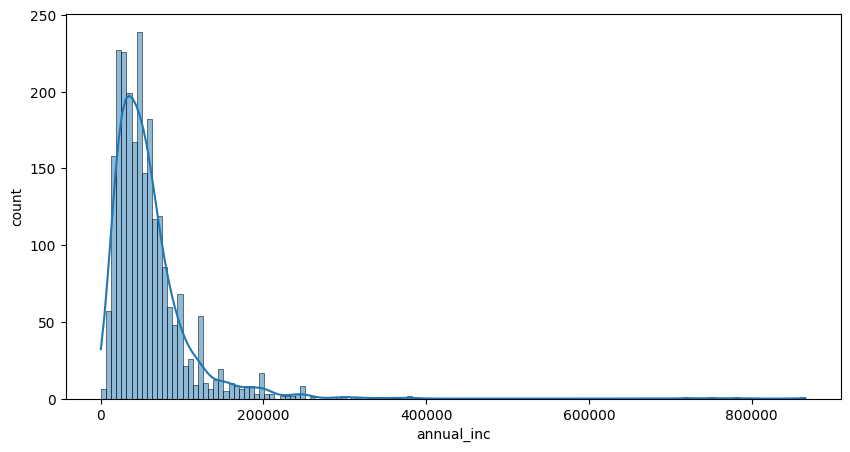

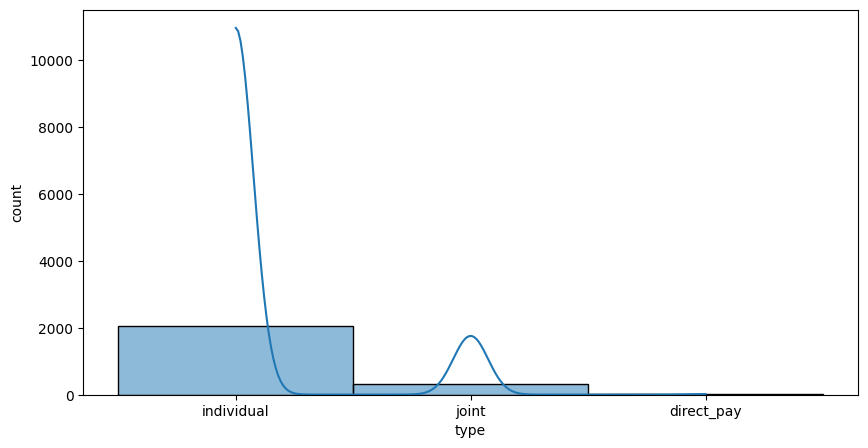

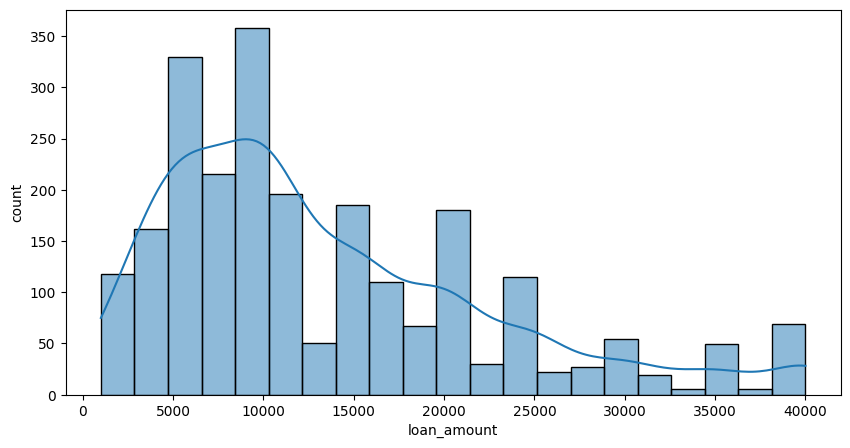

In [136]:
# Check for missing 'Emp Title'  based on 'Annual Inc' or 'Type' or 'Loan Amount'
missing_emp_title = df_clean2[df_clean2['emp_title'].isnull()]

plt.figure(figsize=(14, 7))


# Plot for missing 'Emp Title'
plt.figure(figsize=(10,5))
plt.xlabel('annual_inc')
plt.ylabel('count')
sns.histplot(missing_emp_title['annual_inc'], kde=True)
plt.show()



plt.figure(figsize=(10,5))
plt.xlabel('type')
plt.ylabel('count')
sns.histplot(missing_emp_title['type'], kde=True)
plt.show()

plt.figure(figsize=(10,5))
plt.xlabel('loan_amount')
plt.ylabel('count')
sns.histplot(missing_emp_title['loan_amount'], kde=True)
plt.show()



The theory could be right (shape different than the distribution of annaul income for all data) 
for the other 2 , the distribution is similar to the distribution of the whole data
lets focus on annual_inc now and check the distribution of annual income for the missing values in emp title

In [137]:
print('annual income for missing emp title')
print(missing_emp_title['annual_inc'].describe())
print('\nannual income for all data')
print(df_clean2['annual_inc'].describe())

annual income for missing emp title
count      2366.000000
mean      59663.453184
std       52730.883530
min         445.000000
25%       30000.000000
50%       49000.000000
75%       72000.000000
max      866000.000000
Name: annual_inc, dtype: float64

annual income for all data
count    2.703000e+04
mean     7.958005e+04
std      7.294772e+04
min      4.450000e+02
25%      4.783925e+04
50%      6.600000e+04
75%      9.500000e+04
max      6.500031e+06
Name: annual_inc, dtype: float64


In [138]:
df_temp=df_clean2.copy()
quantiles = df_temp['annual_inc'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])  
bins = quantiles.values  
loan_labels = [f'{int(bins[i])}-{int(bins[i+1])}K' for i in range(len(bins)-1)]
df_temp['income_group'] = pd.cut(df_temp['annual_inc'], bins=bins, labels=loan_labels, include_lowest=True)
missing_int_rate = df_temp[df_temp['emp_title'].isnull()]['income_group'].value_counts()

print("\nPercentage of each Group of Annual income for missing 'Emp Title':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each Group of Annual income for all data:\n")
df_temp['income_group'].value_counts()/df_temp['income_group'].value_counts().sum()*100



Percentage of each Group of Annual income for missing 'Emp Title':
 income_group
445-43000K         43.237532
43000-59500K       18.681319
59500-75000K       15.976331
75000-104514K      11.453931
104514-6500031K    10.650888
Name: count, dtype: float64

Percentage of each Group of Annual income for all data:



income_group
59500-75000K       20.710322
445-43000K         20.025897
104514-6500031K    20.000000
43000-59500K       19.981502
75000-104514K      19.282279
Name: count, dtype: float64

lower income groups have more missing values

Lets also check for emp length

<Figure size 1400x700 with 0 Axes>

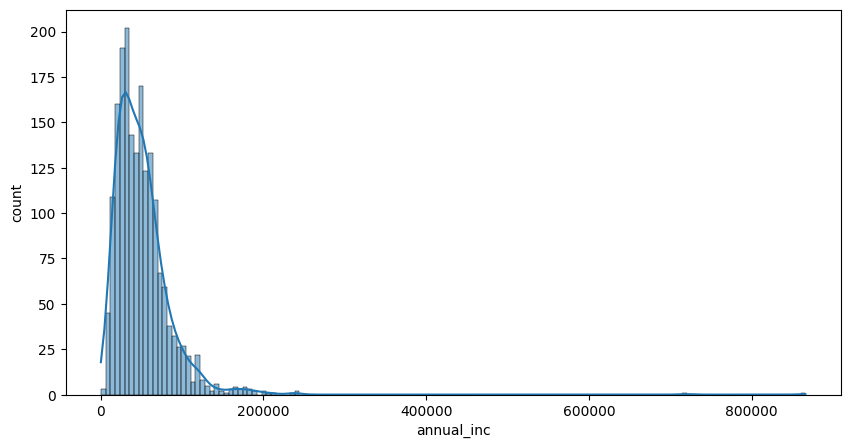

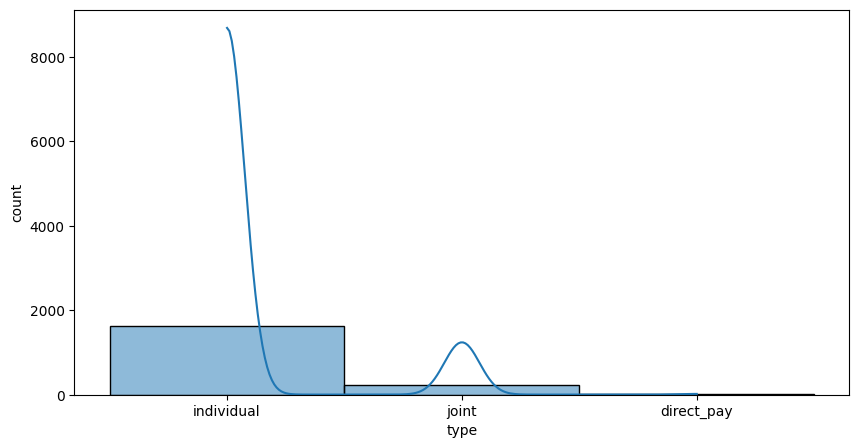

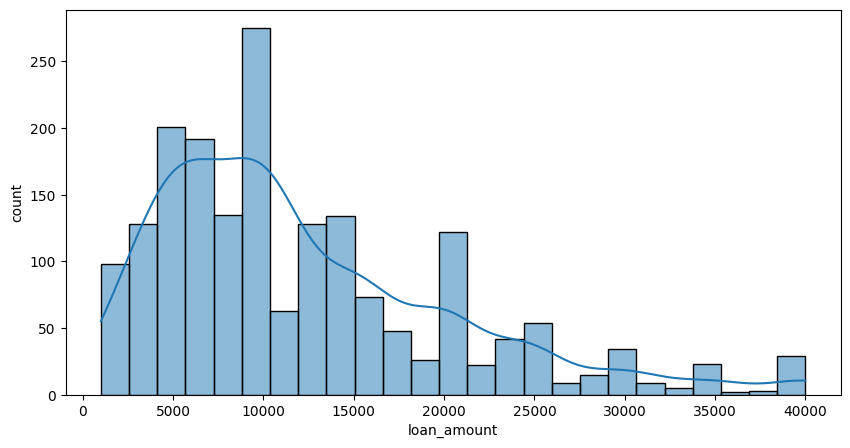

In [139]:
missing_emp_length = df_clean2[df_clean2['emp_length'].isnull()]
plt.figure(figsize=(14, 7))

# Plot for missing 'Emp Title'
plt.figure(figsize=(10,5))
plt.xlabel('annual_inc')
plt.ylabel('count')
sns.histplot(missing_emp_length['annual_inc'], kde=True)
plt.show()


plt.figure(figsize=(10,5))
plt.xlabel('type')
plt.ylabel('count')
sns.histplot(missing_emp_length['type'], kde=True)
plt.show()

plt.figure(figsize=(10,5))
plt.xlabel('loan_amount')
plt.ylabel('count')
sns.histplot(missing_emp_length['loan_amount'], kde=True)
plt.show()



In [140]:
##CHeck if there is a pattern in missing values in emp_length e with annual_inc
df_temp=df_clean2.copy()
quantiles = df_temp['annual_inc'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # You can adjust the number of quantiles
bins = quantiles.values  # Extract the quantile values as the bin edges
loan_labels = [f'{int(bins[i])}-{int(bins[i+1])}K' for i in range(len(bins)-1)]
df_temp['income_group'] = pd.cut(df_temp['annual_inc'], bins=bins, labels=loan_labels, include_lowest=True)
missing_int_rate = df_temp[df_temp['emp_length'].isnull()]['income_group'].value_counts()

print("\nPercentage of each Group of Annual income for missing 'Emp Length':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each Group of Annual income for all data:\n")
df_temp['income_group'].value_counts()/df_temp['income_group'].value_counts().sum()*100
##lower income groups have more missing values




Percentage of each Group of Annual income for missing 'Emp Length':
 income_group
445-43000K         48.288770
43000-59500K       20.320856
59500-75000K       16.096257
75000-104514K       9.732620
104514-6500031K     5.561497
Name: count, dtype: float64

Percentage of each Group of Annual income for all data:



income_group
59500-75000K       20.710322
445-43000K         20.025897
104514-6500031K    20.000000
43000-59500K       19.981502
75000-104514K      19.282279
Name: count, dtype: float64

In [141]:
print('annual income for missing emp length')
print(missing_emp_length['annual_inc'].describe())
print('\nannual income for all data')
print(df_clean2['annual_inc'].describe())

annual income for missing emp length
count      1870.000000
mean      50812.052295
std       39389.012779
min         445.000000
25%       27880.000000
50%       45000.000000
75%       63674.000000
max      866000.000000
Name: annual_inc, dtype: float64

annual income for all data
count    2.703000e+04
mean     7.958005e+04
std      7.294772e+04
min      4.450000e+02
25%      4.783925e+04
50%      6.600000e+04
75%      9.500000e+04
max      6.500031e+06
Name: annual_inc, dtype: float64


Same observations (type of missing data is explained later n finding and conclusion)

In [142]:
# Check if missing 'Int Rate' is related to 'Loan Status'
missing_int_rate = df_clean2[df_clean2['int_rate'].isnull()]['loan_status'].value_counts()

print("\nPercentage of each loan status for missing 'Int Rate':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each loan status for all data")
df_clean2['loan_status'].value_counts()/df_clean2['loan_status'].value_counts().sum()*100
##NO precentages are similar


Percentage of each loan status for missing 'Int Rate':
 loan_status
Current               61.494720
Fully Paid            28.513404
Charged Off            7.798538
Late (31-120 days)     1.462226
In Grace Period        0.568643
Late (16-30 days)      0.162470
Name: count, dtype: float64

Percentage of each loan status for all data


loan_status
Current               62.674806
Fully Paid            28.586755
Charged Off            6.725860
Late (31-120 days)     1.091380
In Grace Period        0.617832
Late (16-30 days)      0.295967
Default                0.007399
Name: count, dtype: float64

In [143]:
# Check if missing 'Int Rate' is related to 'Term'

missing_int_rate = df_clean2[df_clean2['int_rate'].isnull()]['term'].value_counts()

print("\nPercentage of each loan status for missing 'Int Rate':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each loan status for all data")
df_clean2['term'].value_counts()/df_clean2['term'].value_counts().sum()*100
##NO precentages are similar


Percentage of each loan status for missing 'Int Rate':
 term
36    72.867587
60    27.132413
Name: count, dtype: float64

Percentage of each loan status for all data


term
36    70.08879
60    29.91121
Name: count, dtype: float64

In [144]:
## Check if missing 'Int Rate' is related to 'Emp Length'
missing_int_rate = df_clean2[df_clean2['int_rate'].isnull()]['emp_length'].value_counts()

print("\nPercentage of each loan status for missing 'Int Rate':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each loan status for all data")
df_clean2['emp_length'].value_counts()/df_clean2['emp_length'].value_counts().sum()*100


Percentage of each loan status for missing 'Int Rate':
 emp_length
10.0    35.153584
0.5     10.409556
3.0      9.385666
2.0      9.129693
1.0      7.508532
4.0      6.569966
5.0      6.228669
7.0      4.436860
6.0      4.095563
8.0      3.754266
9.0      3.327645
Name: count, dtype: float64

Percentage of each loan status for all data


emp_length
10.0    35.389507
2.0      9.697933
0.5      9.666137
3.0      8.644674
1.0      7.110493
5.0      6.522258
4.0      6.410970
6.0      4.765501
8.0      4.205087
7.0      4.105723
9.0      3.481717
Name: count, dtype: float64

In [145]:
 #Check if missing 'Int Rate' is related to 'Purpose'

missing_pur_rate = df_clean2[df_clean2['int_rate'].isnull()]['purpose'].value_counts()

print("\nPercentage of each loan status for missing 'Int Rate':\n", (missing_pur_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each loan status for all data")
df_clean2['purpose'].value_counts()/df_clean2['purpose'].value_counts().sum()*100


Percentage of each loan status for missing 'Int Rate':
 purpose
debt_consolidation    56.740614
credit_card           27.047782
other                  7.423208
home_improvement       5.887372
major_purchase         2.133106
medical                1.365188
small_business         1.194539
vacation               0.938567
moving                 0.853242
car                    0.853242
house                  0.511945
wedding                0.085324
Name: count, dtype: float64

Percentage of each loan status for all data


purpose
debt_consolidation    56.448391
credit_card           23.858676
home_improvement       6.544580
other                  6.011839
major_purchase         1.927488
medical                1.154273
car                    1.009989
small_business         0.991491
house                  0.717721
moving                 0.640030
vacation               0.621532
renewable_energy       0.059193
wedding                0.014798
Name: count, dtype: float64

In [146]:
df_temp=df_clean2.copy()
quantiles = df_temp['annual_inc'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # You can adjust the number of quantiles
bins = quantiles.values  # Extract the quantile values as the bin edges
loan_labels = [f'{int(bins[i])}-{int(bins[i+1])}K' for i in range(len(bins)-1)]
df_temp['annual_inc_group'] = pd.cut(df_temp['annual_inc'], bins=bins, labels=loan_labels, include_lowest=True)
missing_int_rate = df_temp[df_temp['int_rate'].isnull()]['annual_inc_group'].value_counts()

print("\nPercentage of each income for missing 'Int Rate':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each income for all data")
df_temp['annual_inc_group'].value_counts()/df_temp['annual_inc_group'].value_counts().sum()*100

##the precentages are not significantly different


Percentage of each income for missing 'Int Rate':
 annual_inc_group
104514-6500031K    23.233144
75000-104514K      21.770918
59500-75000K       19.658814
43000-59500K       18.602762
445-43000K         16.734362
Name: count, dtype: float64

Percentage of each income for all data


annual_inc_group
59500-75000K       20.710322
445-43000K         20.025897
104514-6500031K    20.000000
43000-59500K       19.981502
75000-104514K      19.282279
Name: count, dtype: float64

In [147]:
# Check if missing 'Int Rate' is related to 'Loan Amount'

df_temp=df_clean2.copy()
quantiles = df_temp['loan_amount'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # You can adjust the number of quantiles
bins = quantiles.values  # Extract the quantile values as the bin edges
loan_labels = [f'{int(bins[i])}-{int(bins[i+1])}K' for i in range(len(bins)-1)]
df_temp['loan_amount_group'] = pd.cut(df_temp['loan_amount'], bins=bins, labels=loan_labels, include_lowest=True)
missing_int_rate = df_temp[df_temp['int_rate'].isnull()]['loan_amount_group'].value_counts()

print("\nPercentage of each loan amunt for missing 'Int Rate':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each loan amount for all data")
df_temp['loan_amount_group'].value_counts()/df_temp['loan_amount_group'].value_counts().sum()*100
##NO precentages are similar



Percentage of each loan amunt for missing 'Int Rate':
 loan_amount_group
11000-16000K    21.527214
7000-11000K     20.064988
24000-40000K    19.983753
16000-24000K    19.496344
1000-7000K      18.927701
Name: count, dtype: float64

Percentage of each loan amount for all data


loan_amount_group
11000-16000K    21.864595
7000-11000K     20.458750
1000-7000K      20.114687
16000-24000K    18.953015
24000-40000K    18.608953
Name: count, dtype: float64

In [148]:
df_temp=df_clean2.copy()
quantiles = df_temp['grade'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # You can adjust the number of quantiles
bins = quantiles.values  # Extract the quantile values as the bin edges

    # Generate labels for the bins dynamically
grade_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

    # Create a new income_group column based on these dynamic bins
df_temp['grade_group'] = pd.cut(df_temp['grade'], bins=bins, labels=grade_labels, include_lowest=True)
missing_int_rate = df_temp[df_temp['int_rate'].isnull()]['grade_group'].value_counts()

print("\nPercentage of each loan status for missing 'Int Rate':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
df_temp['grade_group'].value_counts()/df_temp['grade_group'].value_counts().sum()*100

##NO precentages are still close



Percentage of each loan status for missing 'Int Rate':
 grade_group
5-9      22.989439
1-5      21.039805
12-16    19.821284
9-12     18.440292
16-35    17.709180
Name: count, dtype: float64


grade_group
5-9      23.366630
1-5      20.854606
12-16    19.445061
16-35    18.668147
9-12     17.665557
Name: count, dtype: float64

In [149]:
missing_int_rate = df_clean2[df_clean2['int_rate'].isnull()]['state'].value_counts()

print("\nPercentage of each state for missing 'Int Rate':\n", (missing_int_rate / missing_int_rate.sum()) * 100)
print("\nPercentage of each state for all data")
df_clean2['state'].value_counts()/df_clean2['state'].value_counts().sum()*100


Percentage of each state for missing 'Int Rate':
 state
CA    45.572705
TX    27.863526
NY    26.563769
Name: count, dtype: float64

Percentage of each state for all data


state
CA    13.877174
NY     8.275990
TX     7.954125
FL     7.373289
IL     4.017758
NJ     3.695893
PA     3.488716
OH     3.381428
GA     3.340733
VA     2.841287
NC     2.737699
MI     2.526822
AZ     2.397336
MD     2.386238
MA     2.253052
CO     2.042175
WA     1.934887
MN     1.764706
CT     1.690714
IN     1.638920
MO     1.613023
NV     1.513134
TN     1.494636
WI     1.246763
AL     1.235664
SC     1.183870
OR     1.132075
LA     1.132075
KY     0.906400
KS     0.899001
OK     0.876804
AR     0.821310
UT     0.673326
MS     0.584536
NM     0.499445
HI     0.462449
NH     0.462449
WV     0.458750
RI     0.440252
NE     0.336663
MT     0.332963
DE     0.281169
VT     0.255272
ID     0.247873
SD     0.247873
DC     0.233074
ME     0.221976
WY     0.214576
AK     0.214576
ND     0.159083
Name: count, dtype: float64

In [189]:
df_clean2[df_clean2['state']=='CA']['int_rate'].unique()

array([0.0819,    nan, 0.2055, 0.1999, 0.1091, 0.1171, 0.1786, 0.1147,
       0.0756, 0.21  , 0.1016, 0.2115, 0.1153, 0.1899, 0.1033, 0.1614,
       0.0532, 0.1144, 0.1629, 0.1699, 0.1249, 0.0818, 0.0917, 0.0867,
       0.0943, 0.0846, 0.1099, 0.1269, 0.0624, 0.0796, 0.0603, 0.234 ,
       0.0824, 0.0944, 0.0993, 0.1797, 0.1602, 0.1212, 0.0699, 0.2245,
       0.2529, 0.1407, 0.1774, 0.2075, 0.1504, 0.1167, 0.1446, 0.1333,
       0.2305, 0.0646, 0.1299, 0.1777, 0.1399, 0.1505, 0.1235, 0.118 ,
       0.2872, 0.1409, 0.0702, 0.1499, 0.245 , 0.1502, 0.1279, 0.1311,
       0.0789, 0.1447, 0.1561, 0.2388, 0.3079, 0.1229, 0.225 , 0.1903,
       0.1149, 0.2089, 0.1102, 0.1064, 0.2677, 0.1709, 0.1719, 0.1359,
       0.1015, 0.0749, 0.0881, 0.2145, 0.1367, 0.1577, 0.0721, 0.1199,
       0.086 , 0.2247, 0.0784, 0.1308, 0.151 , 0.158 , 0.1335, 0.1524,
       0.1105, 0.1042, 0.089 , 0.1318, 0.1008, 0.1678, 0.1349, 0.0949,
       0.1274, 0.288 , 0.2814, 0.2235, 0.0692, 0.0611, 0.263 , 0.2295,
      

In [150]:
df_clean2['description'].unique()

array(['Debt consolidation', 'Credit card refinancing',
       'Home improvement', 'Major purchase', 'Other', 'Home buying',
       'Vacation', 'Debt Cons', 'med laon', 'Debt Consolidation Loan',
       'Medical expenses', 'Moving & Relocation Loan',
       'Remodeled Bathroom', 'Moving and relocation', nan,
       'Car financing', 'Consolidate it.', 'out of debt', 'consolidate',
       'Our Home Dream', 'Peace of Mind', 'Mystery Mission', 'Restucture',
       'Debt Consolidation', 'Business',
       'Payoff Credit Cards After Medical Exp', 'Simplify',
       'consolidation', 'BOA Consolidation', 'Credit Card Refinance',
       'Pay Off Credit Cards', 'CC refinance', 'Credit Card Payoff',
       'Onebill', 'refinance loan', 'Pay Off Bills', 'Repeat',
       'Consolidation', 'Broke as a joke', 'loan payoff', 'LoanMove',
       ' LoanConsol', 'credit card payoff', 'I always pay my debts',
       'Fixer upper', 'Loan Consolidation', 'personal', 'Credit payoff',
       'Debt Consolidator',

In [151]:
df_clean2['description'].value_counts().head(60)

description
Debt consolidation           14299
Credit card refinancing       6069
Home improvement              1697
Other                         1557
Major purchase                 510
Medical expenses               302
Car financing                  254
Business                       247
Home buying                    185
Moving and relocation          165
Vacation                       159
Debt Consolidation             119
Consolidation                   47
debt consolidation              35
Credit Card Consolidation       22
consolidation                   21
Debt Consolidation Loan         18
Credit Card Payoff              16
Green loan                      15
Consolidation Loan              14
Personal Loan                   13
Credit Card Refinance           13
Consolidate                     12
Freedom                         12
consolidate                     12
Home Improvement                11
DEBT CONSOLIDATION               9
credit card consolidation        8
Debt    

## Handling Missing data

In [152]:
def fill_missing_annual_inc_joint(df):
    df.loc[df['type'] != 'joint', 'annual_inc_joint'] = df['annual_inc']
    
    return df

In [153]:
def fill_missing_values_emp(df):
    df['emp_title'].fillna('missing', inplace=True)
    
    
    quantiles = df['annual_inc'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # You can adjust the number of quantiles
    income_bins = quantiles.values  # Extract the quantile values as the bin edges

    # Generate labels for the bins dynamically
    income_labels = [f'{int(income_bins[i])}-{int(income_bins[i+1])}K' for i in range(len(income_bins)-1)]

    # Create a new income_group column based on these dynamic bins
    df['income_group'] = pd.cut(df['annual_inc'], bins=income_bins, labels=income_labels, include_lowest=True)

    # Calculate the median emp_length for each income group
    median_emp_length = df.groupby('income_group')['emp_length'].median()

    # Fill missing emp_length values with the median of their respective income group
    df['emp_length'] = df.apply(
        lambda row: median_emp_length[row['income_group']] if pd.isnull(row['emp_length']) else row['emp_length'], axis=1
    )

    # Drop the temporary income_group column
    df.drop(columns='income_group', inplace=True)
    return df


In [154]:
def fill_missing_values_int_rate(df):
    # Calculate the mean Int Rate for each grade
    mean_int_rate_by_grade = df.groupby('grade')['int_rate'].mean()

    # Impute missing Int Rate values using the mean for the corresponding grade
    df['int_rate'] = df.apply(
        lambda row: mean_int_rate_by_grade[row['grade']] if pd.isnull(row['int_rate']) else row['int_rate'],
        axis=1
    )

    return df




In [155]:
def fill_missing_values_description(df):
    # Fill missing values in the 'Description' column with a placeholder
    df['description'].fillna('No description provided', inplace=True)
   
    return df

## Findings and conclusions

#### Column: `Annual Inc Joint` - Missing Not at Random (MNAR)

**Missingness Type**: **MNAR (Missing Not at Random)**

- The missing values in the `Annual Inc Joint` column are related to the `type` of loan application. The missing data occurs when the loan type is either `individual` or `direct_pay`, and the data is present only for `joint` applications.
- Since the missingness is directly tied to the type of loan , we can classify this as **MNAR (Missing Not at Random)**.

### method `fill_missing_annual_inc_joint` handles the missing values by:

Since annual inc joint represents sum of annual income income for all those who applied for the loan, then for types indiviual an direct pay values are imputed from annual income column


#### Column: `Emp Title` and `Emp Length`

#### 1. `Emp Title` - Missing at Random (MAR)

The missing values in the `Emp Title` column are more frequent among individuals with lower `annual_inc`. Analyzing the distribution of missing values, we see that the average income for those with missing employment titles is lower than that of the overall dataset and the precentage of missing data among lower income groups is more. This suggests a relationship between income and the likelihood of missing `Emp Title` information. Hence, we conclude that the missing data for `Emp Title` is **Missing at Random (MAR)** as it depends on the observed variable `annual_inc`.



#### 2. `Emp Length` - Missing at Random (MAR)

The `Emp Length` column also exhibits missing values more frequently among individuals with lower `annual_inc`. The distribution of missing values for `Emp Length` is skewed towards lower-income individuals, with significantly lower average and median income compared to the rest of the dataset. We can also see that the precentage of customers whose annual income 4445 to 43000K (least income group) is 20% but this precentage is much higher (48%) in the subset of our dataset where `Emp Length` is missing.This indictes that people with lower income tend to have more missing emp length

Therefore, we classify these missing values as **Missing at Random (MAR)**, as the likelihood of missing values depends on the observed variable `annual_inc`.


#### method `fill_missing_values_emp` handles the missing values by:

Assigning a placeholder value of `'missing'` to all missing entries. This ensures that we handle missing titles consistently.Then,dynamically creating income bins (quantiles based on the distribution of the `annual_inc` column) and fills missing values based on the median `emp_length` within those bins.

### Column: `int_rate` - Missing  at Random (MAR)

The Value count of the following columns were tested on the whole dataset and the subset containig missing int_rate

Loan Status

Loan Amount Group

Grade

Purpose

Employment Length

Annual Income

Term

For each of these columns, the percentages of the missing interest rates closely matched the overall distribution in the dataset, suggesting that the missing data was not systematically related to these factors.

However, after conducing same test with State column we see that:CA accounted for 45.57% of the missing interest rate data, much higher than its 13.88% representation in the dataset.
TX and NY showed similar observation.

We can see int_rate is only missing in these states this could be due to data collection in these states being inconsistent. 
 
This could make us conclude that the column `int_rate`
can be classified as ***Missing at Random (MAR)***

### method `handle_missing_values` 
Considering this correlation between int_rate and grade , we can impute the missing values in Int Rate based on the average Int Rate for each Grade. 

#### Column: `Description` - Missing Completely at Random (MCAR)
The missing values in this column are considered to be Missing Completely at Random (MCAR). The descriptions may not have been filled in consistently, leading to missing entries for certain loans.Also,The values seem to be filled by hand, it's possible that some entries were overlooked or not deemed necessary by the person entering the data. This inconsistency may result from human error or variations in the importance placed on providing descriptive details for different loans.
### method `fill_missing_values_description`
replace all missing values in the Description column with the placeholder text "No description provided".

In [156]:
def handle_missing_values(df_org):
    df = df_org.copy()
    df = fill_missing_annual_inc_joint(df)
    df = fill_missing_values_emp(df)
    df = fill_missing_values_int_rate(df)
    df = fill_missing_values_description(df)
    return df
df_clean3=handle_missing_values(df_clean2)


C:\Users\user\AppData\Local\Temp\ipykernel_10188\2438729321.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_title'].fillna('missing', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10188\2438729321.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_emp_length = df.groupby('income_group')['emp_length'].median

## Observing outliers

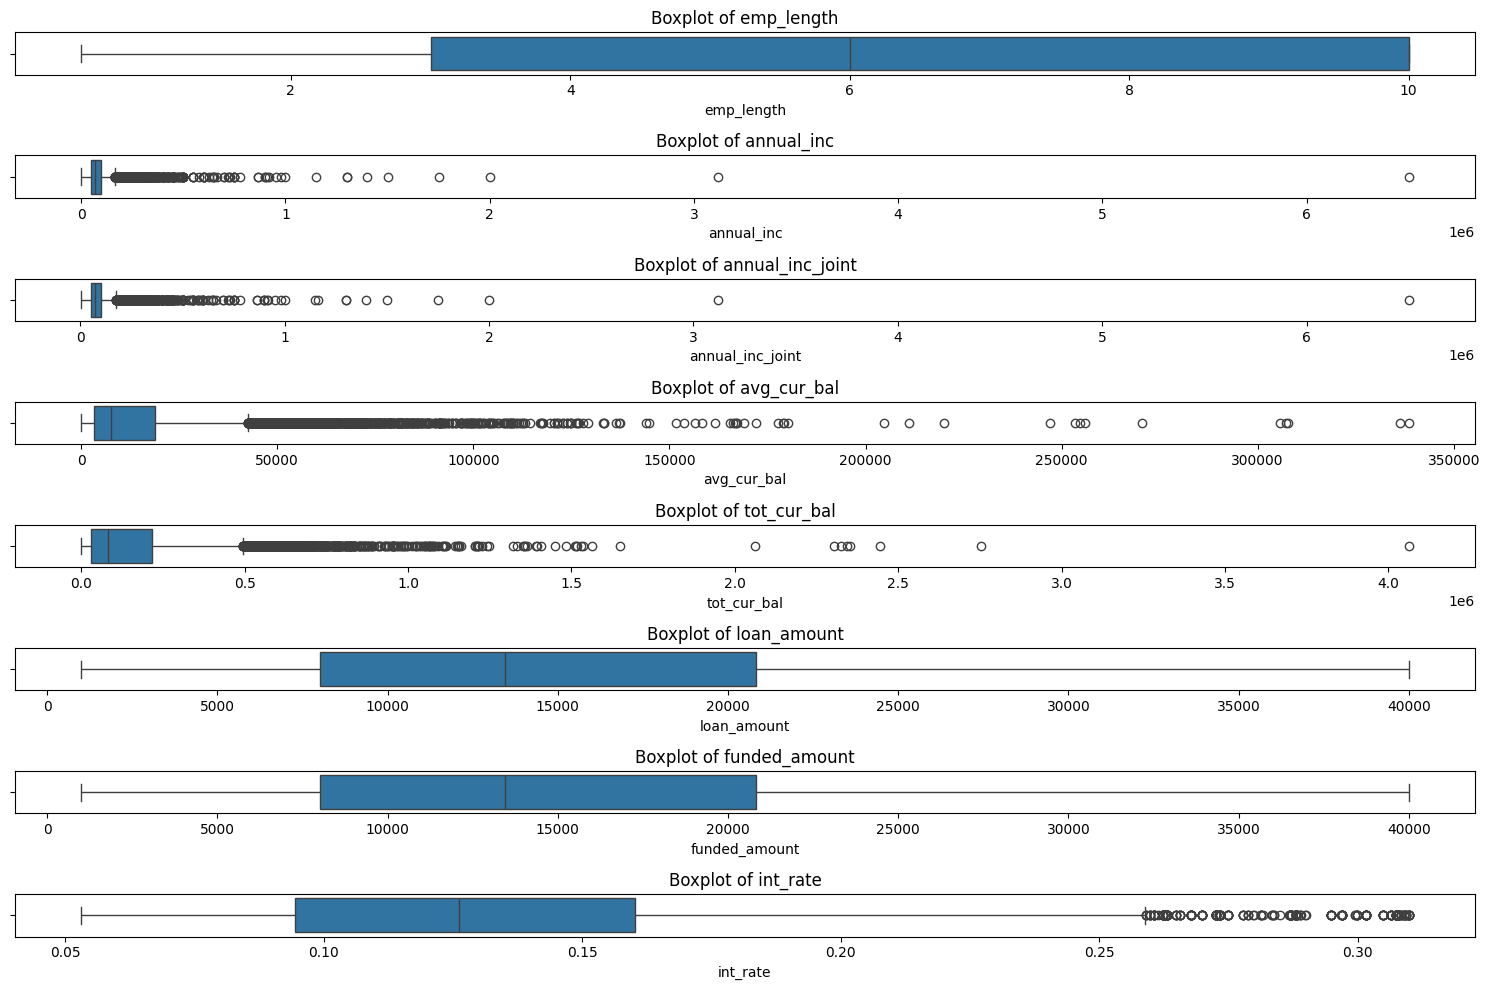

In [157]:
float_columns = df_clean3.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(float_columns, 1):
    plt.subplot(len(float_columns), 1, i)
    sns.boxplot(data=df_clean3, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

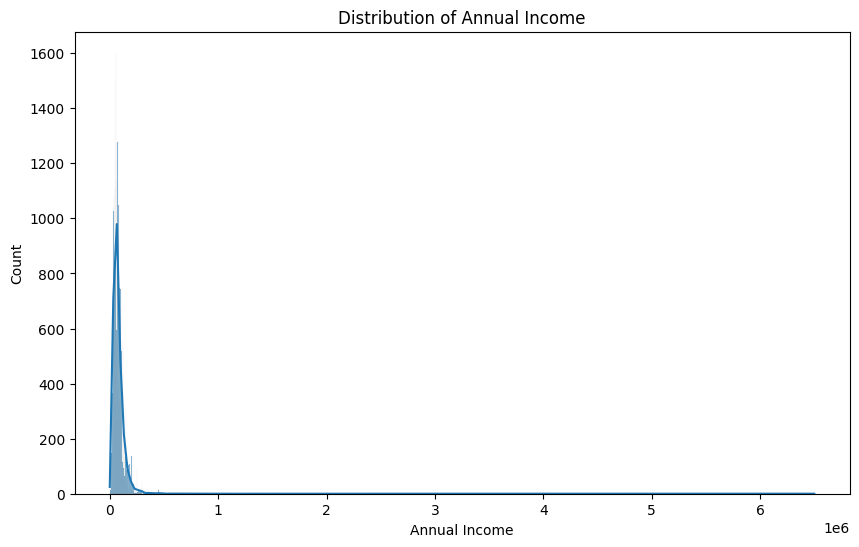

Skewness of annual income: 31.710322297602712
Number of outliers detected using IQR: 1338
Number of outliers detected using Z-score: 224
count    2.703000e+04
mean     7.958005e+04
std      7.294772e+04
min      4.450000e+02
25%      4.783925e+04
50%      6.600000e+04
75%      9.500000e+04
max      6.500031e+06
Name: annual_inc, dtype: float64


In [158]:
##annual_inc
from scipy import stats

# Plotting the distribution of annual income
plt.figure(figsize=(10, 6))
sns.histplot(df_clean3['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()

# Checking the skewness of annual income
skewness = df_clean3['annual_inc'].skew()
print(f"Skewness of annual income: {skewness}")

# Using IQR to detect outliers
Q1 = df_clean3['annual_inc'].quantile(0.25)
Q3 = df_clean3['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Defining IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_clean3[(df_clean3['annual_inc'] < lower_bound) | (df_clean3['annual_inc'] > upper_bound)]
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

# Using Z-score to detect outliers
z_scores = stats.zscore(df_clean3['annual_inc'])
outliers_zscore = df_clean3[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print (df_clean3['annual_inc'].describe())


Skewness of annual income: 0.0860451449087811
Number of outliers detected using Z-score: 209
Precentage of outliers detected using Z-score: 0.7732149463559008


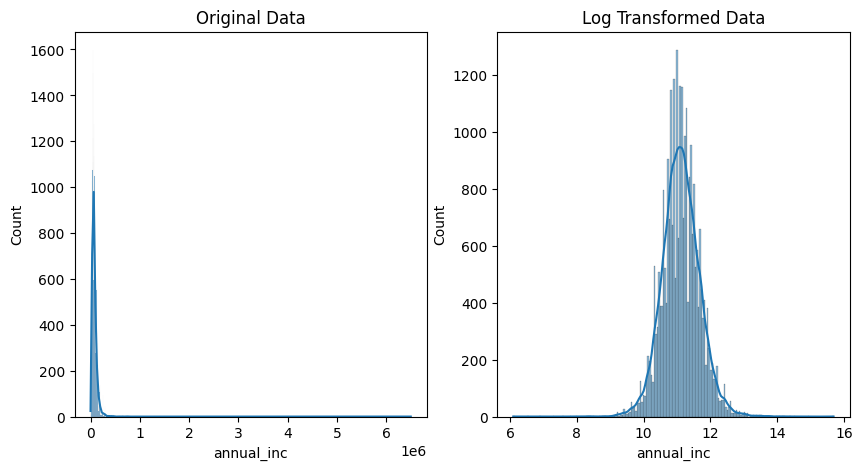

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_tips = np.log(df_clean3['annual_inc'])

sns.histplot(df_clean3['annual_inc'],ax=ax[0], kde=True);
ax[0].set_title('Original Data');

sns.histplot(log_tips, ax=ax[1], kde=True);
ax[1].set_title('Log Transformed Data');
skewness =log_tips.skew()
print(f"Skewness of annual income: {skewness}")


# Using Z-score to detect outliers
z_scores = stats.zscore(log_tips)
outliers_zscore = df_clean3[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print(f"Precentage of outliers detected using Z-score: {len(outliers_zscore)/len(df_clean3)*100}")



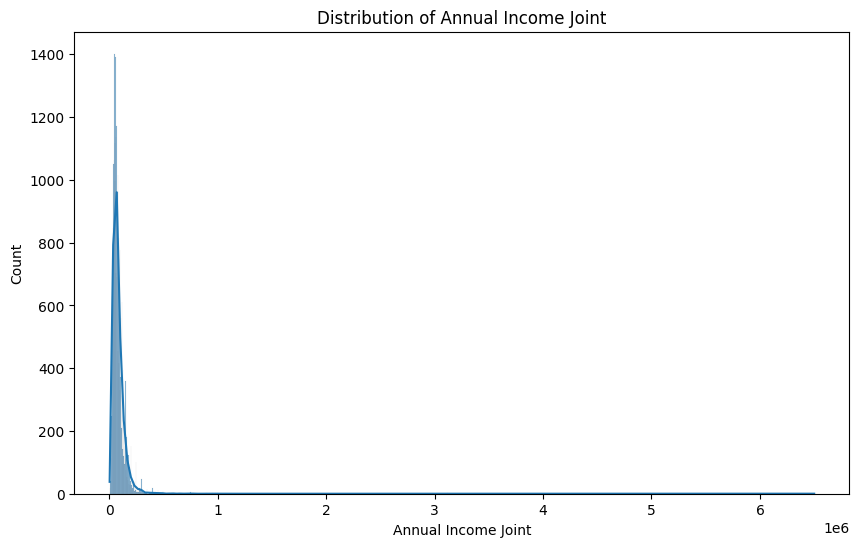

Skewness of annual income: 28.682827549769453
Number of outliers detected using IQR: 1402
Number of outliers detected using Z-score: 205
count    2.703000e+04
mean     8.429532e+04
std      7.559637e+04
min      4.200000e+03
25%      5.000000e+04
50%      7.000000e+04
75%      1.000000e+05
max      6.500031e+06
Name: annual_inc_joint, dtype: float64


In [160]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean3['annual_inc_joint'], kde=True)
plt.title('Distribution of Annual Income Joint')
plt.xlabel('Annual Income Joint')
plt.show()

# Checking the skewness of annual income
skewness = df_clean3['annual_inc_joint'].skew()
print(f"Skewness of annual income: {skewness}")

# Using IQR to detect outliers
Q1 = df_clean3['annual_inc_joint'].quantile(0.25)
Q3 = df_clean3['annual_inc_joint'].quantile(0.75)
IQR = Q3 - Q1

# Defining IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_clean3[(df_clean3['annual_inc_joint'] < lower_bound) | (df_clean3['annual_inc_joint'] > upper_bound)]
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

# Using Z-score to detect outliers
z_scores = stats.zscore(df_clean3['annual_inc_joint'])
outliers_zscore = df_clean3[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print (df_clean3['annual_inc_joint'].describe())


Skewness of annual income: 0.24675713110800226
Number of outliers detected using Z-score: 183
Precentage of outliers detected using Z-score: 0.6770255271920089


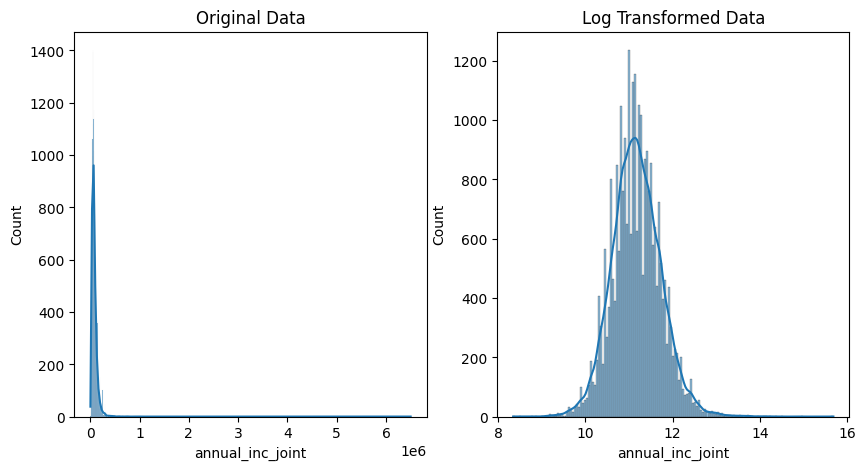

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_tips = np.log(df_clean3['annual_inc_joint'])

sns.histplot(df_clean3['annual_inc_joint'],ax=ax[0], kde=True);
ax[0].set_title('Original Data');

sns.histplot(log_tips, ax=ax[1], kde=True);
ax[1].set_title('Log Transformed Data');
skewness =log_tips.skew()
print(f"Skewness of annual income: {skewness}")

# Using Z-score to detect outliers
z_scores = stats.zscore(log_tips)
outliers_zscore = log_tips[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print(f"Precentage of outliers detected using Z-score: {len(outliers_zscore)/len(df_clean3)*100}")


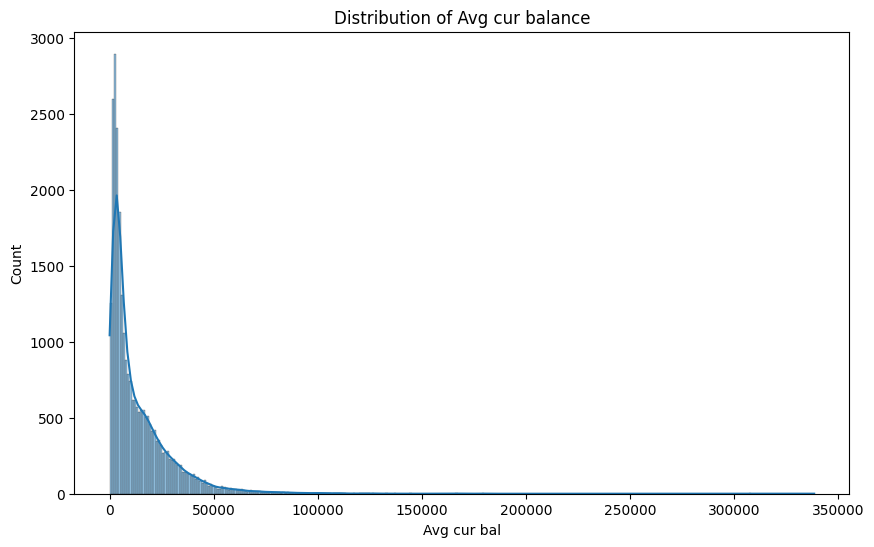

Skewness of avg cur bal : 4.133226013634394
Number of outliers detected using IQR: 1409
Number of outliers detected using Z-score: 440
count     27030.000000
mean      13699.805993
std       16820.305157
min           0.000000
25%        3155.250000
50%        7504.500000
75%       18936.000000
max      338522.000000
Name: avg_cur_bal, dtype: float64


In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean3['avg_cur_bal'], kde=True)
plt.title('Distribution of Avg cur balance')
plt.xlabel('Avg cur bal')
plt.show()

# Checking the skewness of annual income
skewness = df_clean3['avg_cur_bal'].skew()
print(f"Skewness of avg cur bal : {skewness}")

# Using IQR to detect outliers
Q1 = df_clean3['avg_cur_bal'].quantile(0.25)
Q3 = df_clean3['avg_cur_bal'].quantile(0.75)
IQR = Q3 - Q1

# Defining IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_clean3[(df_clean3['avg_cur_bal'] < lower_bound) | (df_clean3['avg_cur_bal'] > upper_bound)]
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

# Using Z-score to detect outliers
z_scores = stats.zscore(df_clean3['avg_cur_bal'])
outliers_zscore = df_clean3[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print (df_clean3['avg_cur_bal'].describe())


d:\Farah\Semester8\Data Eng\Milestone1\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Farah\Semester8\Data Eng\Milestone1\.venv\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Skewness of annual income: nan


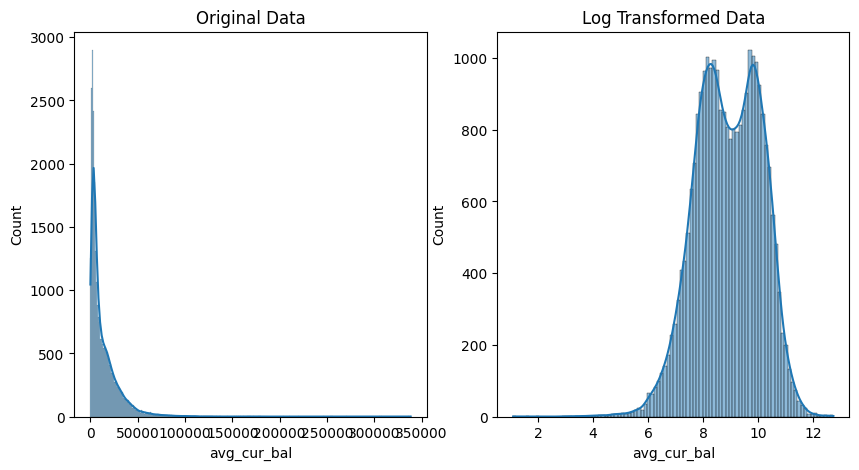

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_tips = np.log(df_clean3['avg_cur_bal'])

sns.histplot(df_clean3['avg_cur_bal'],ax=ax[0], kde=True);
ax[0].set_title('Original Data');

sns.histplot(log_tips, ax=ax[1], kde=True);
ax[1].set_title('Log Transformed Data');
skewness =log_tips.skew()
print(f"Skewness of annual income: {skewness}")



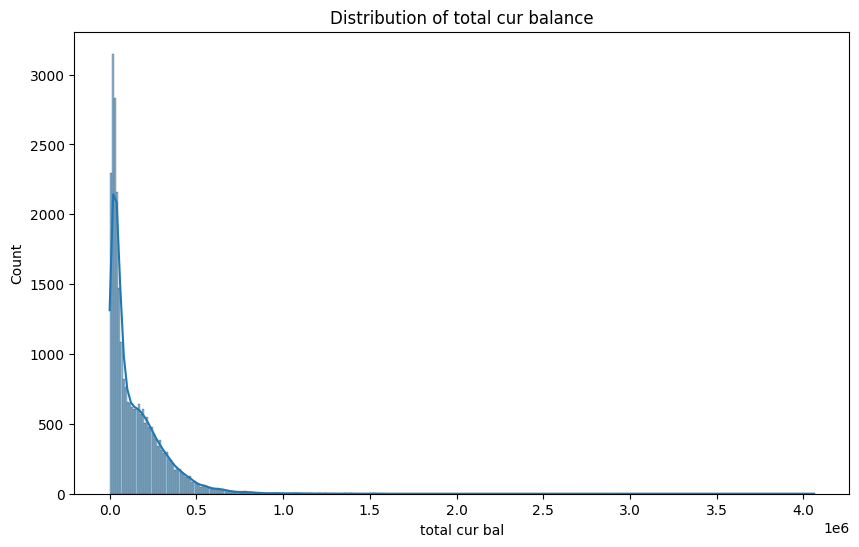

Skewness of total cur bal : 3.0503377264104343
Number of outliers detected using IQR: 954
Number of outliers detected using Z-score: 396
count    2.703000e+04
mean     1.447354e+05
std      1.632325e+05
min      0.000000e+00
25%      3.025950e+04
50%      8.150450e+04
75%      2.162978e+05
max      4.062258e+06
Name: tot_cur_bal, dtype: float64


In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean3['tot_cur_bal'], kde=True)
plt.title('Distribution of total cur balance')
plt.xlabel('total cur bal')
plt.show()

# Checking the skewness of annual income
skewness = df_clean3['tot_cur_bal'].skew()
print(f"Skewness of total cur bal : {skewness}")

# Using IQR to detect outliers
Q1 = df_clean3['tot_cur_bal'].quantile(0.25)
Q3 = df_clean3['tot_cur_bal'].quantile(0.75)
IQR = Q3 - Q1

# Defining IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_clean3[(df_clean3['tot_cur_bal'] < lower_bound) | (df_clean3['tot_cur_bal'] > upper_bound)]
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

# Using Z-score to detect outliers
z_scores = stats.zscore(df_clean3['tot_cur_bal'])
outliers_zscore = df_clean3[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print (df_clean3['tot_cur_bal'].describe())


d:\Farah\Semester8\Data Eng\Milestone1\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Farah\Semester8\Data Eng\Milestone1\.venv\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Skewness of annual income: nan


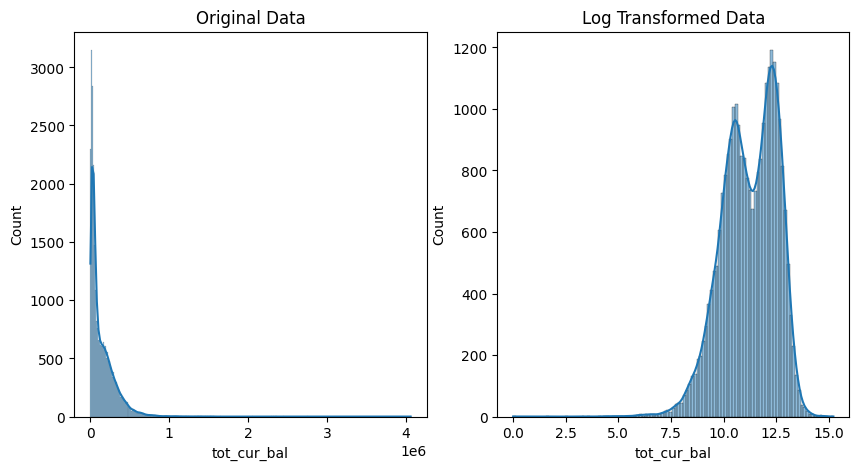

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_tips = np.log(df_clean3['tot_cur_bal'])

sns.histplot(df_clean3['tot_cur_bal'],ax=ax[0], kde=True);
ax[0].set_title('Original Data');

sns.histplot(log_tips, ax=ax[1], kde=True);
ax[1].set_title('Log Transformed Data');
skewness =log_tips.skew()
print(f"Skewness of annual income: {skewness}")




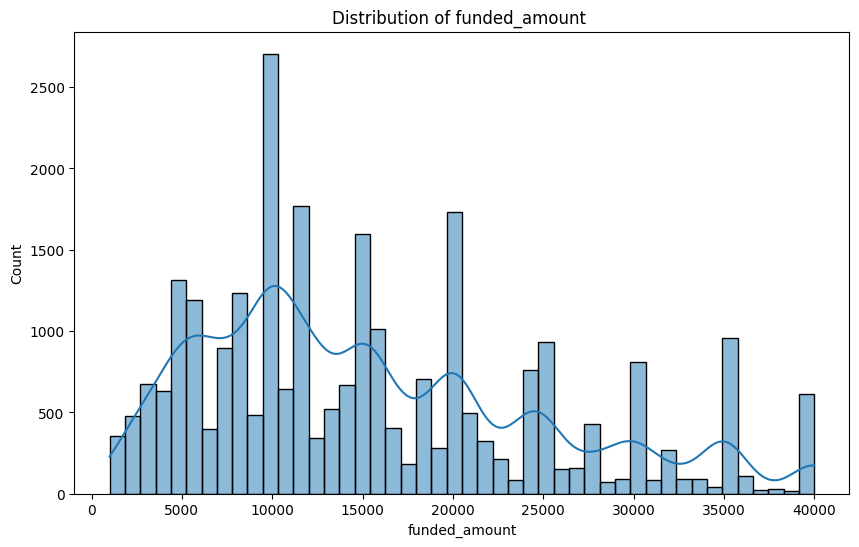

Skewness of funded_amount: 0.758827677483961
Number of outliers detected using IQR: 0
Number of outliers detected using Z-score: 0
count    27030.000000
mean     15503.214021
std       9451.817873
min       1000.000000
25%       8000.000000
50%      13450.000000
75%      20825.000000
max      40000.000000
Name: funded_amount, dtype: float64


In [166]:
##annual_inc
from scipy import stats

# Plotting the distribution of annual income
plt.figure(figsize=(10, 6))
sns.histplot(df_clean3['funded_amount'], kde=True)
plt.title('Distribution of funded_amount ')
plt.xlabel('funded_amount')
plt.show()

# Checking the skewness of annual income
skewness = df_clean3['funded_amount'].skew()
print(f"Skewness of funded_amount: {skewness}")

# Using IQR to detect outliers
Q1 = df_clean3['funded_amount'].quantile(0.25)
Q3 = df_clean3['funded_amount'].quantile(0.75)
IQR = Q3 - Q1

# Defining IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_clean3[(df_clean3['funded_amount'] < lower_bound) | (df_clean3['funded_amount'] > upper_bound)]
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

# Using Z-score to detect outliers
z_scores = stats.zscore(df_clean3['funded_amount'])
outliers_zscore = df_clean3[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print (df_clean3['funded_amount'].describe())
##NO OUTLIERSSSSS


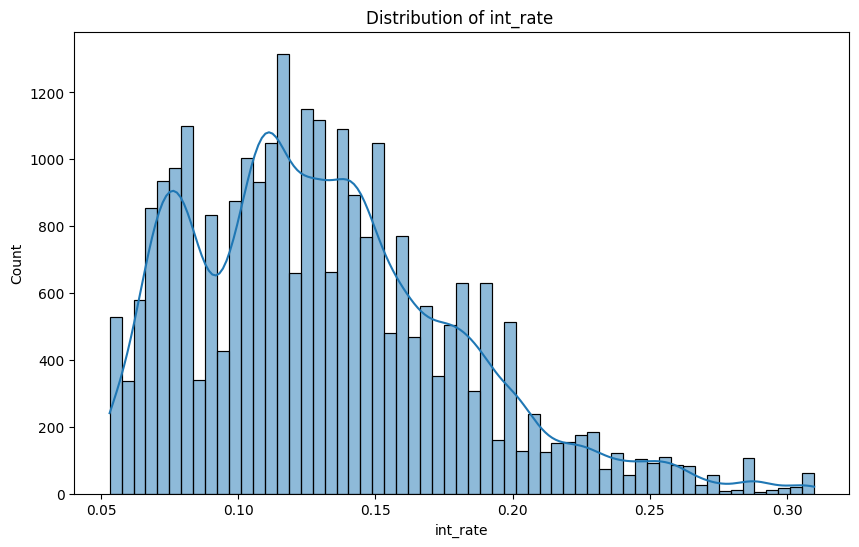

Skewness of annual income: 0.7623098276232483
Number of outliers detected using IQR: 416
Number of outliers detected using Z-score: 238
count    27030.000000
mean         0.131285
std          0.048710
min          0.053100
25%          0.094400
50%          0.126200
75%          0.160200
max          0.309900
Name: int_rate, dtype: float64


In [167]:
##annual_inc
from scipy import stats

# Plotting the distribution of annual income
plt.figure(figsize=(10, 6))
sns.histplot(df_clean3['int_rate'], kde=True)
plt.title('Distribution of int_rate ')
plt.xlabel('int_rate')
plt.show()

# Checking the skewness of annual income
skewness = df_clean3['int_rate'].skew()
print(f"Skewness of annual income: {skewness}")

# Using IQR to detect outliers
Q1 = df_clean3['int_rate'].quantile(0.25)
Q3 = df_clean3['int_rate'].quantile(0.75)
IQR = Q3 - Q1

# Defining IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_clean3[(df_clean3['int_rate'] < lower_bound) | (df_clean3['int_rate'] > upper_bound)]
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

# Using Z-score to detect outliers
z_scores = stats.zscore(df_clean3['int_rate'])
outliers_zscore = df_clean3[(z_scores < -3) | (z_scores > 3)]
print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")
print (df_clean3['int_rate'].describe())


## Handling outliers

In [168]:
def handle_outliers_annual_inc(df):
   
    df['annual_inc'] = np.log(df['annual_inc'] + 1)  
   
    return df



In [169]:

def handle_outliers_annual_inc_joint(df):    
    df['annual_inc_joint'] = np.log(df['annual_inc_joint'] + 1) 
    return df
# df_clean6=df_clean3.copy()
# df_clean6=handle_outliers_annual_inc_joint(df_clean6)
# print(df_clean6['annual_inc_joint'].describe())
# print(df_clean3['annual_inc_joint'].describe())
# z_scores = stats.zscore(df_clean6['annual_inc_joint'])
# outliers_zscore = df_clean6[(z_scores < -3) | (z_scores > 3)]
# print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")



In [170]:
def handle_outliers_avg_cur_bal(df):
    Q1 = df['avg_cur_bal'].quantile(0.25)
    Q3 = df['avg_cur_bal'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = max(Q1 - 1.5 * IQR,0)
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df['avg_cur_bal'] = df['avg_cur_bal'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

# df_clean6=df_clean3.copy()
# df_clean6=handle_outliers_avg_cur_bal(df_clean6)
# print(df_clean6['avg_cur_bal'].describe())
# print(df_clean3['avg_cur_bal'].describe())
# z_scores = stats.zscore(df_clean6['avg_cur_bal'])
# outliers_zscore = df_clean6[(z_scores < -3) | (z_scores > 3)]
# print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")



In [171]:
def handle_outliers_tot_cur_bal(df):
    Q1 = df['tot_cur_bal'].quantile(0.25)
    Q3 = df['tot_cur_bal'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = max(Q1 - 1.5 * IQR,0)
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    df['tot_cur_bal'] = df['tot_cur_bal'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

# df_clean6=df_clean3.copy()
# df_clean6=handle_outliers_tot_cur_bal(df_clean6)
# print(df_clean6['tot_cur_bal'].describe())
# print(df_clean3['tot_cur_bal'].describe())
# z_scores = stats.zscore(df_clean6['tot_cur_bal'])
# outliers_zscore = df_clean6[(z_scores < -3) | (z_scores > 3)]
# print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")

In [172]:

def handle_outliers_int_rate(df):
    ##use zscore
    df['zscore'] = stats.zscore(df['int_rate'])
    threshold = 3
    lower_bound = np.percentile(df['int_rate'], 5)
    upper_bound = np.percentile(df['int_rate'], 95)

    # Cap the outliers using the median value
    df['int_rate'] = df['int_rate'].where(df['zscore'].abs() < threshold, 
                                       np.where(df['zscore'] > 0, upper_bound, lower_bound))
    df.drop(columns='zscore', inplace=True)

    
    return df

# df_clean6=df_clean3.copy()
# df_clean6=handle_outliers_int_rate(df_clean6)
# print(df_clean6['int_rate'].describe())
# print(df_clean3['int_rate'].describe())
# z_scores = stats.zscore(df_clean6['int_rate'])
# outliers_zscore = df_clean6[(z_scores < -3) | (z_scores > 3)]
# print(f"Number of outliers detected using Z-score: {len(outliers_zscore)}")





## Findings and conclusions

#### Handling Outliers for `annual_inc`

- **Distribution Skewness**: The `annual_inc` column shows a high skewness of 31.71, indicating a significant right-skew in the data, which could also be seen from the plot
- The distribution is not  normal.
So log transformation was used now skewness is 0.08 
Number of outliers detected by zscore (normal dis and contionus data) after the transformation is less 1% so they were left
  
This is handled by the method : ***handle_outliers_annual_inc***


#### Handling Outliers for `annual_inc_joint`

- **Distribution Skewness**: The `annual_inc_joint` column shows a high skewness of 28.7, indicating a significant right-skew in the data, which could also be seen from the plot
- The distribution is not  normal.

So log transformation was used now skewness is 0.24 .

Number of outliers detected by zscore (normal dis and contionus data) after the transformation is less 1% so they were left
  
This is handled by the method : ***handle_outliers_annual_inc_joint***

#### Handling Outliers for `avg_cur_bal`

- **Distribution Skewness**: The `avg_cur_bal` column shows  right skewness , however after applying log transformation, data will be left skewed 


Therefore I will use the ***IQR*** methond to handle outliers in  ***handle_outliers_avg_cur_bal***

#### Handling Outliers for `tot_cur_bal`

- **Distribution Skewness**: The `tot_cur_bal` column shows  right skewness , however after applying log transformation, data will be left skewed 

Therefore I will use the ***IQR*** methond to handle outliers in  ***handle_outliers_tot_cur_bal***

#### Handling Outliers for `int_rate`

- **Distribution Skewness**: The `int_rate` column has skewness less than 1 and more than -1. so  can be consired normally distributed and is contionus
Therefore I will use the ***Zscore*** methond to detect outliers and cap using 5 and 95 percentile in  ***handle_outliers_int_rate***

In [173]:
def handle_outliers(df_org):
    df=df_org.copy()
    df = handle_outliers_annual_inc(df)
    df = handle_outliers_annual_inc_joint(df)
    df = handle_outliers_avg_cur_bal(df)
    df = handle_outliers_tot_cur_bal(df)
    df = handle_outliers_int_rate(df)
    return df
df_clean4=handle_outliers(df_clean3)


# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

In [174]:
def add_month_number(df):
    df['month_number'] = df['issue_date'].dt.month
    
    return df

In [175]:
def add_salary_can_cover(df):
    df['salary_can_cover'] = np.exp(df['annual_inc_joint'])>= df['loan_amount']
    df['salary_can_cover'] = df['salary_can_cover'].astype(int)
   
    return df

##np.exp used on annual_inc as it was log transformed

In [176]:

def encode_letter_grade(df):
    # Define the bins and corresponding labels
    bins = [1, 5, 10, 15, 20, 25, 30, 35]
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    df['letter_grade'] = pd.cut(df['grade'], bins=bins, labels=labels, right=True, include_lowest=True)
    df.drop(columns='grade', inplace=True)
    

    return df


In [177]:
def calculate_installment_per_month(df):
    # Calculate the monthly interest rate
    r = df['int_rate'] / 12
    n = df['term']
    P = df['loan_amount']
    df['installment_per_month'] = P *(( r * (1 + r)**n) / ((1 + r)**n - 1))
    
    return df



In [178]:
def add_columns(df_org):
    df = df_org.copy()
    df = add_month_number(df)
    df = add_salary_can_cover(df)
    df = encode_letter_grade(df)
    df = calculate_installment_per_month(df)
    return df
df_clean5=add_columns(df_clean4)
# df_clean5.info()

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

### Explanation of Categorical Encoding Techniques

#### 1. One-Hot Encoding

- **Purpose**: One-Hot Encoding is applied to nominal variables that do not have a specific order, such as `home_ownership`, `verification_status`, `loan_status`, `type`, and `purpose`.


#### 2. Ordinal Encoding

- **Purpose**: Ordinal Encoding is utilized for the `letter_grade` variable, which represents a natural ranking from A to G.



In [179]:
def encode_one_hot(df):
    nominal_vars = ['home_ownership', 'verification_status', 'loan_status', 'type', 'purpose']
    for var in nominal_vars:
        df_encoded = pd.get_dummies(df[var], prefix=var).astype(int)
        df = pd.merge(df, df_encoded, left_index=True, right_index=True)
        df.drop(columns=var, inplace=True)
    return df

In [180]:
def encode_ordinal(df):
    grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    df['letter_grade'] = pd.Categorical(df['letter_grade'], categories=grade_order, ordered=True)
    df['letter_grade_encoded'] = df['letter_grade'].cat.codes
    df.drop(columns='letter_grade', inplace=True)
    
    return df


In [181]:
def encode(df_org):
    df = df_org.copy()
    df = encode_one_hot(df)
    df = encode_ordinal(df)
    return df
df_clean6=encode(df_clean5)
df_clean6.head()

,customer_id,emp_title,emp_length,annual_inc,annual_inc_joint,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_amount,state,funded_amount,term,int_rate,issue_date,pymnt_plan,description,month_number,salary_can_cover,installment_per_month,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),type_direct_pay,type_individual,type_joint,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,letter_grade_encoded
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83748,YicyXHhkMVx4ODVceDExXG5gTyVceDhjRChccmJceGUzJS...,project manager,3.0,11.608245,11.608245,085xx,NJ,36486.0,255401.0,10000.0,NJ,10000.0,36,0.0646,2019-01-19,0,Debt consolidation,1,1,306.307998,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
142833,YiJceGU4XHhlZTNceGFhXHhkM1x4MTNUJ294XHhmM2VsNl...,it supervisor,3.0,11.097425,11.097425,477xx,IN,36558.0,182789.0,14400.0,IN,14400.0,60,0.1262,2017-09-17,0,Debt consolidation,9,1,324.849900,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
201119,Yid9XHhiOFx4MTVceDkzXHhmMVx4ODQlXHhjZVx4YjVceD...,project engineer,1.0,11.277216,11.277216,993xx,WA,37390.0,299117.0,20000.0,WA,20000.0,60,0.1899,2017-03-17,0,Debt consolidation,3,1,518.700981,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
86602,YidceDhhXHhlM15ceDgwIVx4ODlceGRhQFx4MDclMFx4YW...,driver,10.0,10.596660,10.596660,626xx,IL,5160.0,46437.0,10000.0,IL,10000.0,36,0.0808,2018-06-18,0,Credit card refinancing,6,1,313.732842,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
134390,YidceGMxaVx4ODNceGIzXHg4ZXw5XHg5ZVx4OGNceDA2T1...,delivery,4.0,10.404293,10.404293,166xx,PA,11209.0,56045.0,13000.0,PA,13000.0,60,0.1273,2018-11-18,0,Debt consolidation,11,1,293.996253,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## 4.3 - Normalization 

In [182]:
df_clean6.describe()

,emp_length,annual_inc,annual_inc_joint,avg_cur_bal,tot_cur_bal,loan_amount,funded_amount,term,int_rate,issue_date,pymnt_plan,month_number,salary_can_cover,installment_per_month,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),type_direct_pay,type_individual,type_joint,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,letter_grade_encoded
count,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.00000,27030.000000,27030,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000
mean,5.877950,11.115575,11.171920,12590.785687,138309.544071,15503.214021,15503.214021,43.17869,0.130656,2017-01-30 13:26:02.264150784,0.000037,6.710433,0.999963,456.168774,0.001036,0.497003,0.114132,0.387828,0.353422,0.390492,0.256086,0.067259,0.626748,0.000074,0.285868,0.006178,0.002960,0.010914,0.001073,0.928709,0.070218,0.010100,0.238587,0.564484,0.065446,0.007177,0.019275,0.011543,0.006400,0.060118,0.000592,0.009915,0.006215,0.000148,1.597780
min,0.500000,6.100319,8.343078,0.000000,0.000000,1000.000000,1000.000000,36.00000,0.053100,2012-08-12 00:00:00,0.000000,1.000000,0.000000,30.435532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,10.775623,10.819798,3155.250000,30259.500000,8000.000000,8000.000000,36.00000,0.094400,2015-09-15 00:00:00,0.000000,4.000000,1.000000,259.921271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.000000,11.097425,11.156265,7504.500000,81504.500000,13450.000000,13450.000000,36.00000,0.126200,2017-03-17 00:00:00,0.000000,7.000000,1.000000,386.811991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,10.000000,11.461643,11.512935,18936.000000,216297.750000,20825.000000,20825.000000,60.00000,0.160200,2018-08-18 00:00:00,0.000000,10.000000,1.000000,610.299069,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,10.000000,15.687318,15.687318,42607.125000,495355.125000,40000.000000,40000.000000,60.00000,0.274900,2019-12-19 00:00:00,1.000000,12.000000,1.000000,1590.393036,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

## 4.31 - Findings and conclusions

### Purpose of Normalization



The following columns have been selected for normalization:

- **avg_cur_bal**
- **tot_cur_bal**
- **loan_amount**
- **funded_amount**
- **int_rate**
- **installment_per_month**

We will apply **standardization (Z-score normalization)** to these features. 

Note: the columns **annual_inc** and **annual_inc_joint** have been previously transformed using a logarithmic transformation when handling outliers. Therefore, they do not require further normalization at this stage,

In [183]:

def normalize(df_org):
    df=df_org.copy()
    columns_to_standardize = ['avg_cur_bal', 'tot_cur_bal', 'loan_amount', 
                           'funded_amount', 'int_rate', 'installment_per_month']
    scaler = StandardScaler()
    
    # Fit and transform the selected columns
    df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

    
    return df
df_clean7=normalize(df_clean6)

# 5 - Lookup Table(s)

In [184]:
def save_lookup_table():
    df = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    df.to_csv('lookup.csv', index=False)
    lookup = [
            {'Column':'emp_length','Original': '< 1 year', 'Encoded': 0.5},
            {'Column':'emp_length','Original': '1 year', 'Encoded': 1},
            {'Column':'emp_length','Original': '2 years', 'Encoded': 2},
            {'Column':'emp_length','Original': '3 years', 'Encoded': 3},
            {'Column':'emp_length','Original': '4 years', 'Encoded': 4},
            {'Column':'emp_length','Original': '5 years', 'Encoded': 5},
            {'Column':'emp_length','Original': '6 years', 'Encoded': 6},
            {'Column':'emp_length','Original': '7 years', 'Encoded': 7},
            {'Column':'emp_length','Original': '8 years', 'Encoded': 8},
            {'Column':'emp_length','Original': '9 years', 'Encoded': 9},
            {'Column':'emp_length','Original': '10+ years', 'Encoded': 10},
            {'Column':'term','Original': '36 months', 'Encoded': 36},
            {'Column':'term','Original': '60 months', 'Encoded': 60},
            {'Column':'type','Original': 'INDIVIDUAL', 'Encoded': 'individual'},
            {'Column':'type','Original': 'JOINT', 'Encoded': 'joint'},
            {'Column':'type','Original': 'Joint App', 'Encoded': 'joint'},
            {'Column':'type','Original': 'DIRECT_PAY', 'Encoded': 'direct_pay'},
            {'Column':'pymnt_plan','Original': 'False', 'Encoded': 0},
            {'Column':'pymnt_plan','Original': 'True', 'Encoded': 1},
            {'Column':'annual_inc_joint','Original': '', 'Encoded': 'Value from col annual_inc'},
            {'Column':'emp_title','Original': '', 'Encoded': 'missing'},
            {'Column':'description','Original': '', 'Encoded': 'No description provided'},
            {'Column':'grade','Original': '1', 'Encoded': 'A'},
            {'Column':'grade','Original': '2', 'Encoded': 'A'},
            {'Column':'grade','Original': '3', 'Encoded': 'A'},
            {'Column':'grade','Original': '4', 'Encoded': 'A'},
            {'Column':'grade','Original': '5', 'Encoded': 'A'},
            {'Column':'grade','Original': '6', 'Encoded': 'B'},
            {'Column':'grade','Original': '7', 'Encoded': 'B'},
            {'Column':'grade','Original': '8', 'Encoded': 'B'},
            {'Column':'grade','Original': '9', 'Encoded': 'B'},
            {'Column':'grade','Original': '10', 'Encoded': 'B'},
            {'Column':'grade','Original': '11', 'Encoded': 'C'},
            {'Column':'grade','Original': '12', 'Encoded': 'C'},
            {'Column':'grade','Original': '13', 'Encoded': 'C'},
            {'Column':'grade','Original': '14', 'Encoded': 'C'},
            {'Column':'grade','Original': '15', 'Encoded': 'C'},
            {'Column':'grade','Original': '16', 'Encoded': 'D'},
            {'Column':'grade','Original': '17', 'Encoded': 'D'},
            {'Column':'grade','Original': '18', 'Encoded': 'D'},
            {'Column':'grade','Original': '19', 'Encoded': 'D'},
            {'Column':'grade','Original': '20', 'Encoded': 'D'},
            {'Column':'grade','Original': '21', 'Encoded': 'E'},
            {'Column':'grade','Original': '22', 'Encoded': 'E'},
            {'Column':'grade','Original': '23', 'Encoded': 'E'},
            {'Column':'grade','Original': '24', 'Encoded': 'E'},
            {'Column':'grade','Original': '25', 'Encoded': 'E'},
            {'Column':'grade','Original': '26', 'Encoded': 'F'},
            {'Column':'grade','Original': '27', 'Encoded': 'F'},
            {'Column':'grade','Original': '28', 'Encoded': 'F'},
            {'Column':'grade','Original': '29', 'Encoded': 'F'},
            {'Column':'grade','Original': '30', 'Encoded': 'F'},
            {'Column':'grade','Original': '31', 'Encoded': 'G'},
            {'Column':'grade','Original': '32', 'Encoded': 'G'},
            {'Column':'grade','Original': '33', 'Encoded': 'G'},
            {'Column':'grade','Original': '34', 'Encoded': 'G'},
            {'Column':'grade','Original': '35', 'Encoded': 'G'},
             {'Column':'letter_grade','Original': 'A', 'Encoded': '0'},
            {'Column':'letter_grade','Original': 'B', 'Encoded': '1'},
            {'Column':'letter_grade','Original': 'C', 'Encoded': '2'},
            {'Column':'letter_grade','Original': 'D', 'Encoded': '3'},
            {'Column':'letter_grade','Original': 'E', 'Encoded': '4'},
            {'Column':'letter_grade','Original': 'F', 'Encoded': '5'},
            {'Column':'letter_grade','Original': 'G', 'Encoded': '6'}

        ]
        
        # Write to the existing CSV file without overwriting
    with open('lookup.csv', 'a', newline='') as csvfile:
        fieldnames = ['Column','Original', 'Encoded']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            # Only write the rows
        for row in lookup:
            writer.writerow(row)

save_lookup_table()

# 6 - Bonus ( Data Integration )

In [185]:
import requests
from bs4 import BeautifulSoup

def getStateName(df_org):
  df = df_org.copy()

  url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"

  payload = {}
  headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    'Cookie': 'AMCVS_A90F2A0D55423F537F000101%40AdobeOrg=1; s_cc=true; AMCV_A90F2A0D55423F537F000101%40AdobeOrg=-1124106680%7CMCIDTS%7C20012%7CMCMID%7C05646005586689377582520772768635170518%7CMCAAMLH-1729586519%7C6%7CMCAAMB-1729586519%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1728988920s%7CNONE%7CMCAID%7C331D9D1855191762-60000D9560649392%7CvVersion%7C5.2.0; gpv_pu=www23.statcan.gc.ca%2Fimdb%2Fp3VD.pl; gpv_pt=List%20of%20U.S.%20States%20with%20Codes%20and%20Abbreviations; gpv_pthl=blank%20theme; gpv_pc=Government%20of%20Canada%2C%20Statistics%20Canada; gpv_pqs=%3Ffunction%3Dgetvd%26tvd%3D53971; gpv_url=www23.statcan.gc.ca%2Fimdb%2Fp3VD.pl; s_ips=641; s_tp=3187; s_ppv=List%2520of%2520U.S.%2520States%2520with%2520Codes%2520and%2520Abbreviations%2C20%2C20%2C641%2C1%2C4; s_plt=6.84',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Google Chrome";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"'
  }

  response = requests.request("GET", url, headers=headers, data=payload)

  html_code = response.text

      
  soup = BeautifulSoup(html_code, 'html.parser')
  state_mapping = {}

  # Find all rows in the table body
  table = soup.find('table')  # Adjust this to target the specific table

  # Iterate through the rows of the table
  for row in table.find_all('tr'):
      cols = row.find_all('td')  # Find all columns in the row
      # print(cols)
      # Ensure there are enough columns before accessing them
      if len(cols) >= 3:
          state_name = cols[0].text.strip()          # Second column for state name
          state_abbreviation = cols[2].text.strip()  # Fourth column for state abbreviation
          
          state_mapping[state_abbreviation] = state_name

  df['state_name'] = df['state'].map(state_mapping)

  return df
df_clean8=getStateName(df_clean7)

  
    

In [186]:
len(df_clean8['state_name'].unique())==len(df_clean8['state'].unique())

True

## 5- Exporting the dataframe to a csv file or parquet

In [187]:
# Assuming you have a DataFrame named df_clean
df_clean8.to_parquet('fintech_data_MET_P2_52_0324_clean.parquet', engine='pyarrow')


In [ ]:
df=('fintech_data_MET_P2_52_0324_clean.csv')